In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
import random
import math
import joblib

In [2]:
train_data = pd.read_csv(r"archive/fashion-mnist_train.csv")
test_data = pd.read_csv(r"archive/fashion-mnist_test.csv")

X = train_data[train_data.columns[1:]]
y = train_data['label']

X_test = test_data[test_data.columns[1:]]
y_test = test_data['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/6, stratify=y,random_state=42)

X_train.reset_index(inplace=True,drop=True)
y_train = y_train.reset_index(drop=True)
X_val.reset_index(inplace=True,drop=True)
y_val = y_val.reset_index(drop=True)

In [3]:
y_cols = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

print("Length of train and validation set respectively: ")
len(X_train),len(X_val)

Length of train and validation set respectively: 


(50000, 10000)

In [4]:
def display_img(data_df:pd.DataFrame):
    display_df = data_df.sample(n=20)
    fig, axs = plt.subplots(4,5, figsize=(15, 6))
    fig.subplots_adjust(hspace = .5, wspace=.005)

    axs = axs.ravel()
    X_cols = display_df.columns[1:]
    for i in range(20):
        axs[i].imshow(np.expand_dims(display_df.iloc[i][X_cols].values,1).reshape((28,28)),cmap="Greys")
        axs[i].set_title(f"{y_cols[display_df.iloc[i]['label']]}")

## PLOTTING DATA BEFORE PCA

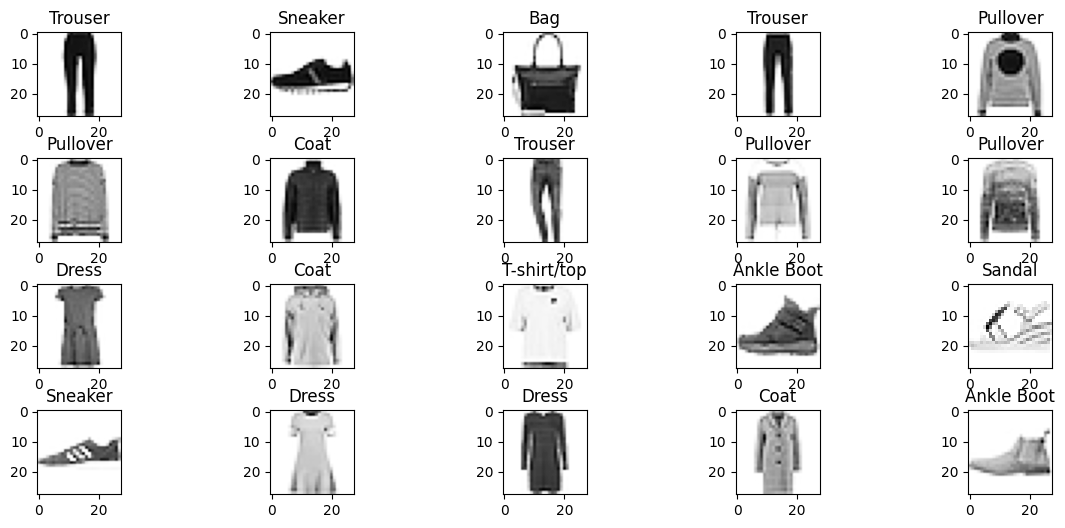

In [5]:
display_img(train_data)

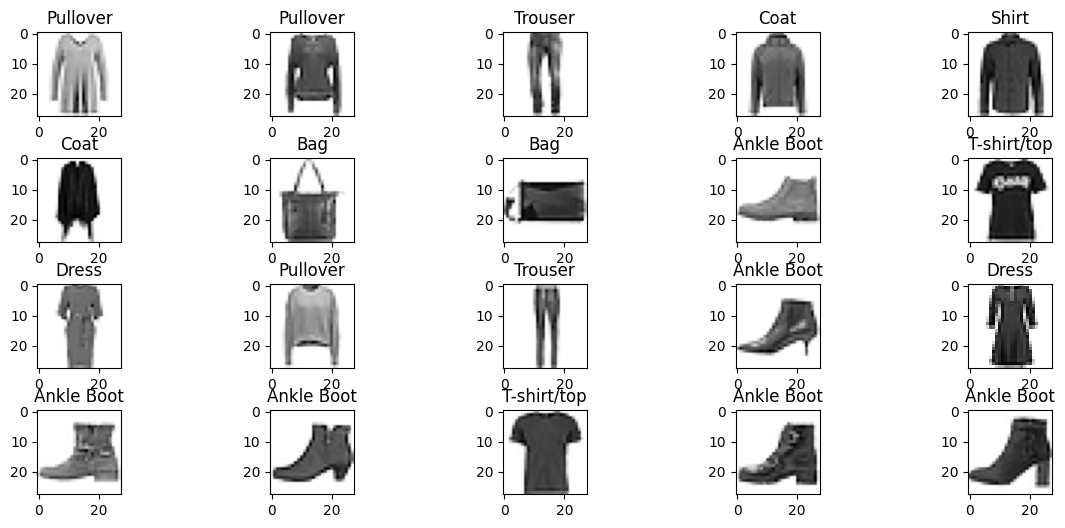

In [6]:
display_img(test_data)

## RANDOM FOREST CLASSIFIER FOR THE DATASET WITHOUT PCA

In [7]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [8]:
start = time.time()
rf_model = RandomForestClassifier(n_jobs=-1,random_state=42)

rf_model.fit(X_train,y_train)
print(f"It took {round(time.time()-start,3)} seconds")

It took 4.817 seconds


In [9]:
print("Validation accuracy of RF Model: ",rf_model.score(X_val,y_val))
print("Test accuracy of RF Model: ",rf_model.score(X_test,y_test))

Validation accuracy of RF Model:  0.8765
Test accuracy of RF Model:  0.8835


## APPLYING PCA

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_scaled = pca.fit_transform(X_train)

In [11]:
plt.style.use('ggplot')
explained_var = pca.explained_variance_ratio_
cum_var = explained_var.cumsum()

## 95% EXPLAINED VARIANCE

In [12]:
#Getting the required number of PCA components that explain 95% of the variance
req_comp = np.where(cum_var>=0.95)[0][0] + 1
print(f"The number of required PCA components: ",req_comp)

The number of required PCA components:  187


Text(0, 0.5, 'Cumulative Explained Variance')

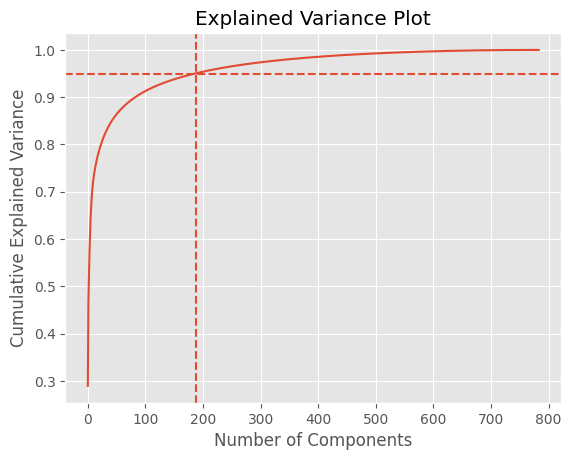

In [13]:
plt.style.use("ggplot")
plt.plot(cum_var)
plt.axhline(0.95,linestyle='--')
plt.axvline(req_comp,linestyle='--')
plt.title("Explained Variance Plot")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [14]:
pca_trans = PCA(n_components=req_comp)

X_train_scaled = pca_trans.fit_transform(X_train)
X_val_scaled = pca_trans.transform(X_val)
X_test_scaled = pca_trans.transform(X_test)

In [15]:
X_recovered_train = pca_trans.inverse_transform(X_train_scaled)
X_recovered_val = pca_trans.inverse_transform(X_val_scaled)

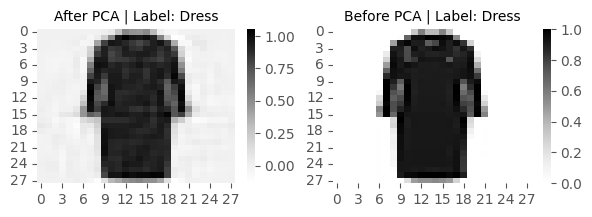

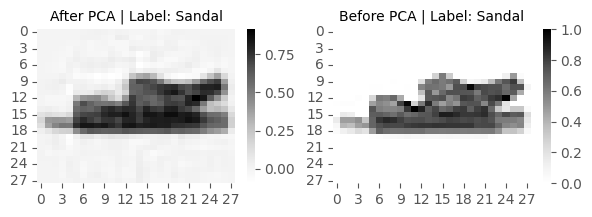

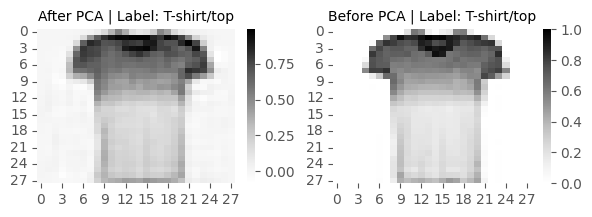

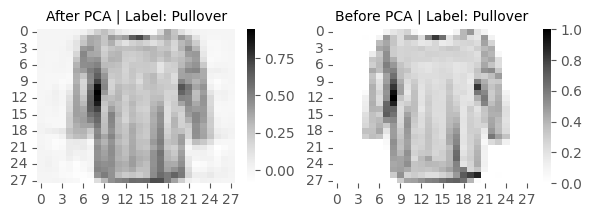

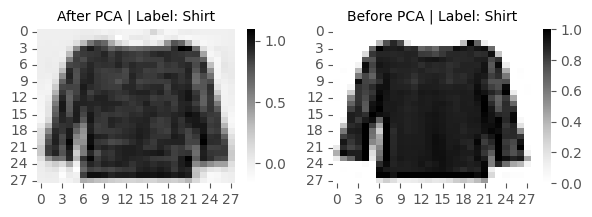

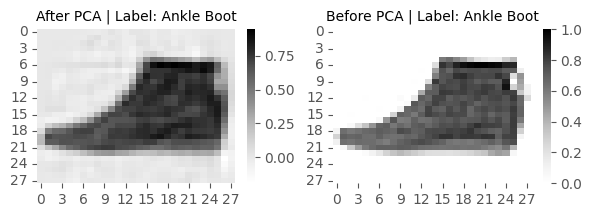

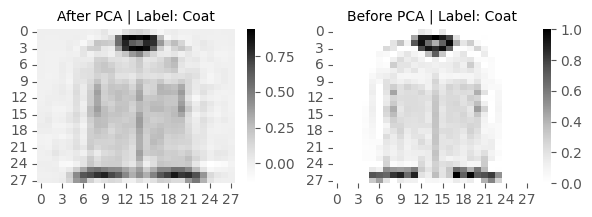

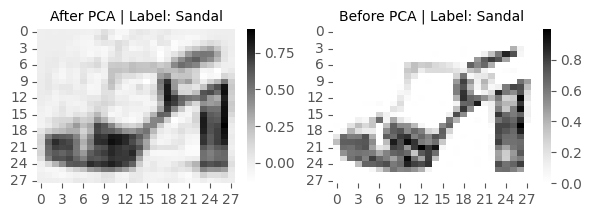

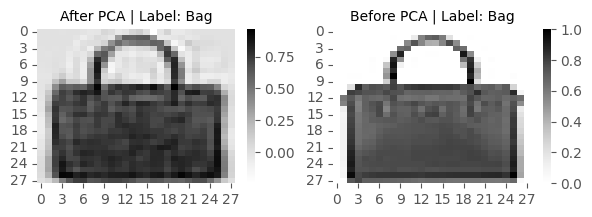

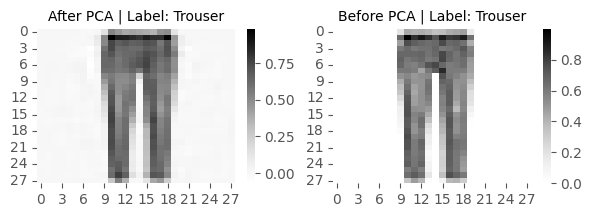

In [16]:
random_idxs = np.random.randint(low=0,high=len(X_train),size=10)

for idx in random_idxs:
    fig, axs = plt.subplots(1, 2, figsize=(7, 2))
    sns.heatmap(X_train.loc[idx].values.reshape(28,28),ax=axs[1],cmap='Greys')
    sns.heatmap(X_recovered_train[idx].reshape(28,28),ax=axs[0],cmap='Greys')
    axs[0].set_title(f"After PCA | Label: {y_cols[y_train[idx]]}",fontsize=10)
    axs[1].set_title(f"Before PCA | Label: {y_cols[y_train[idx]]}",fontsize=10)

In [17]:
start = time.time()
pca_rf_model = RandomForestClassifier(n_jobs=-1,random_state=42)
pca_rf_model.fit(X_train_scaled,y_train)
print(f"It took {round(time.time()-start,2)} seconds")

It took 7.01 seconds


In [18]:
print("Validation accuracy of RF Model: ",pca_rf_model.score(X_val_scaled,y_val))
print("Test accuracy of RF Model: ",pca_rf_model.score(X_test_scaled,y_test))

Validation accuracy of RF Model:  0.8601
Test accuracy of RF Model:  0.861


## EXPLAINED VARIANCE FROM FIRST TWO COMPONENTS

## PCA PLOTS

In [21]:
pca_2d = PCA(n_components=2)

X_train_2d = pca_2d.fit_transform(X_train)

In [22]:
comps = 2
print(f"Variance explained by first two {comps} is {round(sum(pca_2d.explained_variance_ratio_),3)} ")

Variance explained by first two 2 is 0.467 


Use PCA to reduce dimensionality to only 2 dimensions

In [26]:
pca_2D = PCA(n_components=2) # n_components=2 reduces the number of features to 2
X_2D_PCA = pd.DataFrame(pca_2D.fit_transform(X_train),columns=['x','y'])

Use LLE to reduce dimensionality to only 2 dimensions

In [153]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_jobs=-1)
X_2D_LLE = lle.fit_transform(X_train)

Use TSNE to reduce dimensionality to only 2 dimensions


In [39]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_train)
X_2D_TSNE = pd.DataFrame(X_embedded,columns=['x','y'])

Use MDS to reduce dimensionality to only 2 dimensions

In [40]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2,n_jobs=-1,max_iter=100).fit_transform(X_train[:5000])
X_2D_MDS = pd.DataFrame(embedding,columns=['x','y'])

/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Plot 1000 random images from the training set in the 2D space spanned by the first two principal components. Use a scatterplot with 10 different colors to represent each image’s target class



B. Plot a 2D scatter plot of the images spanned by the first two principal components

PCA PLOT

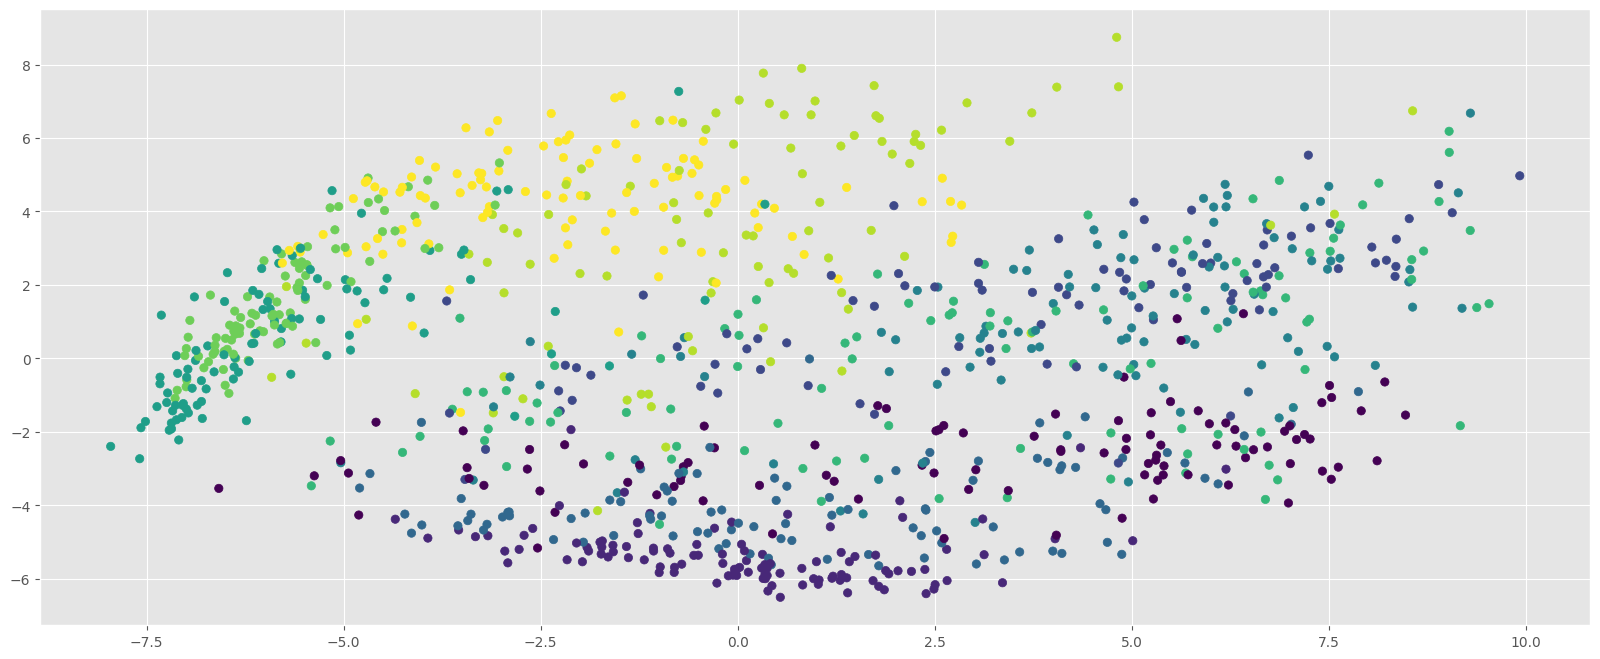

In [27]:
import random
num_images = 1000
comb_list = list(zip(X_train_2d,y_train))
selected_list = random.sample(comb_list,num_images)
X_2d_plot = [td for (td,l) in selected_list]
y_2d_plot = [l for (td,l) in selected_list]
X_2d_plot = np.array(X_2d_plot)
y_2d_plot = np.array(y_2d_plot)
plt.figure(figsize=(20,8))
ax = plt.scatter(X_2d_plot[:,0],X_2d_plot[:,1],c=y_2d_plot,label=y_cols)

In [28]:
def getImage(image_data):
    return OffsetImage(pca_2D.inverse_transform(image_data).reshape(28,28),cmap='gray',zoom=0.5)

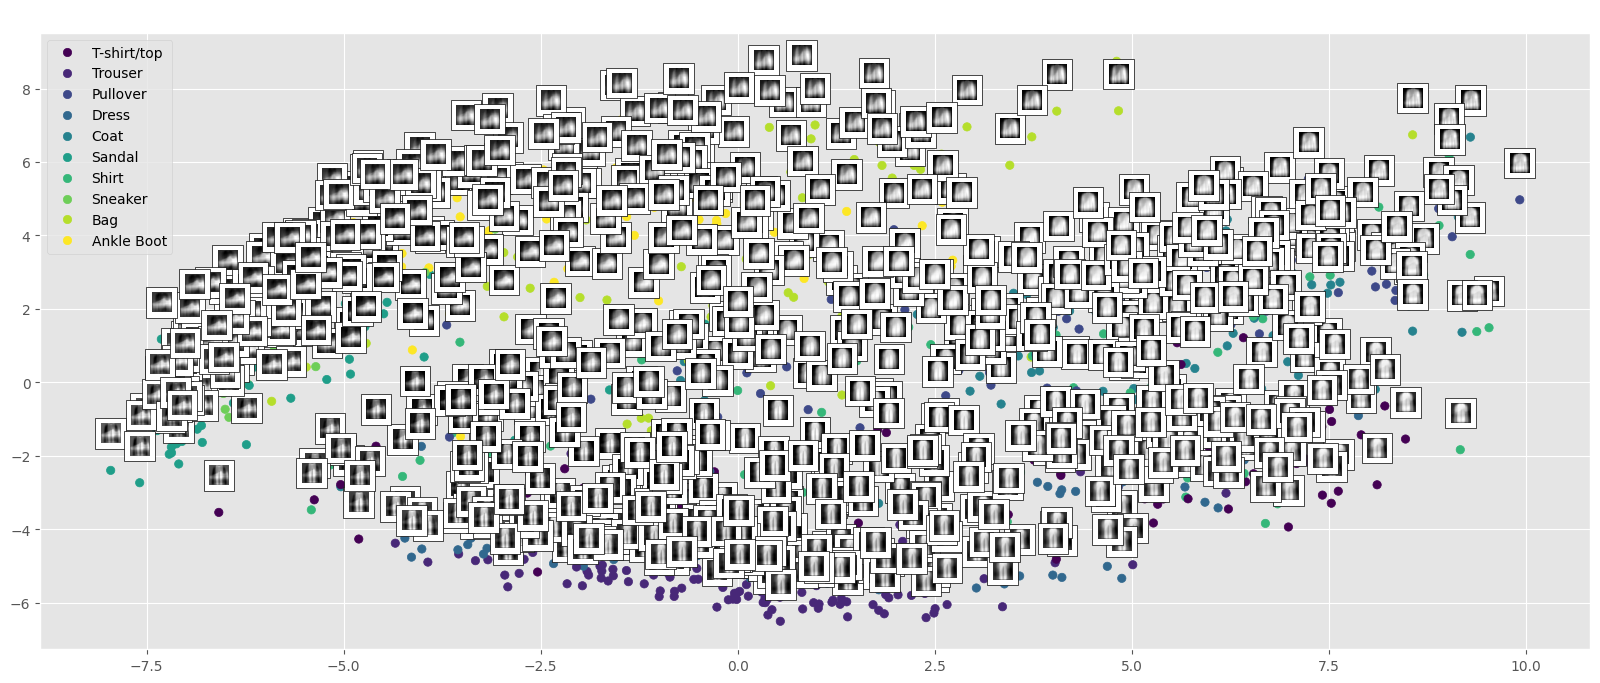

In [29]:
from matplotlib.offsetbox import AnnotationBbox,OffsetImage
fig, ax = plt.subplots(figsize=(20,8))
scatter = ax.scatter(X_2d_plot[:,0], X_2d_plot[:,1], c=y_2d_plot,label=y_cols)
legend = ax.legend(handles=scatter.legend_elements()[0], labels=y_cols)
for x0, y0, image in zip(X_2d_plot[:,0], X_2d_plot[:,1], X_2d_plot):
     ab = AnnotationBbox(getImage(image), (x0, y0+1))
     ax.add_artist(ab)
plt.show()

LLE PLOT

In [49]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_2D_LLE = pd.DataFrame(lle.fit_transform(X_train),columns=['x','y'])

In [51]:
def plot_scatter(reduced_data,name):
  image_labels=y_train.values.tolist()
  label_type = np.unique(image_labels)
  label_colors = {0: 'red', 2: 'green', 1: 'blue', 3: 'pink', 4: 'orange', 5: 'yellow', 6: 'purple', 7: 'brown', 8: 'grey', 9: 'black'}
  plt.figure(figsize=(13, 10))
  for lab in label_type:
      if lab== 0:
        lab_label='T-shirt/top'
      elif lab==1:
        lab_label='Trouser'
      elif lab==2:
        lab_label='Pullover'
      elif lab==3:
        lab_label='Dress'
      elif lab==4:
        lab_label='Coat'
      elif lab==5:
        lab_label='Sandal'
      elif lab==6:
        lab_label='Shirt'
      elif lab==7:
        lab_label='Sneaker'
      elif lab==8:
        lab_label='Bag'
      else:
        lab_label='Ankle boot'
      indices = np.where(image_labels == lab)
      plt.scatter(
          reduced_data[indices, 0],
          reduced_data[indices, 1],
          label=lab_label,
          color=label_colors[lab],
      )
      plt.axis("off")
      for i in indices[0]:
        if i % 8 == 0 :
                        image_path = X_train.iloc[i].to_numpy().reshape(28,28)
                        imagebox = OffsetImage(image_path, zoom=0.7,cmap='gray')
                        xy = reduced_data[i]
                        ab = AnnotationBbox(imagebox, xy, xycoords='data', boxcoords="data", frameon=False, arrowprops=dict(arrowstyle="->"))
                        plt.gca().add_artist(ab)
  plt.title(f'{name} Scatter Plot of Reduced Data with Images')
  plt.legend()
  plt.show()


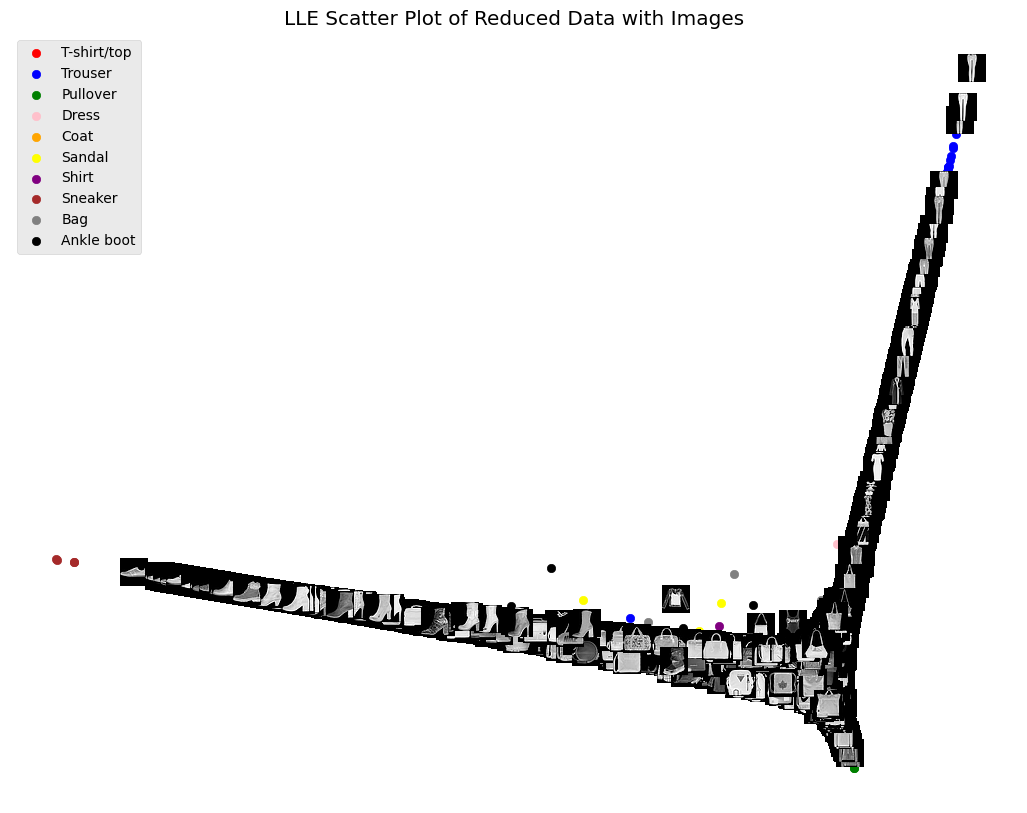

In [52]:
plot_scatter(lle.fit_transform(X_train),'LLE')

TSNE PLOT

In [33]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_train)
X_2D_TSNE = pd.DataFrame(X_embedded,columns=['x','y'])

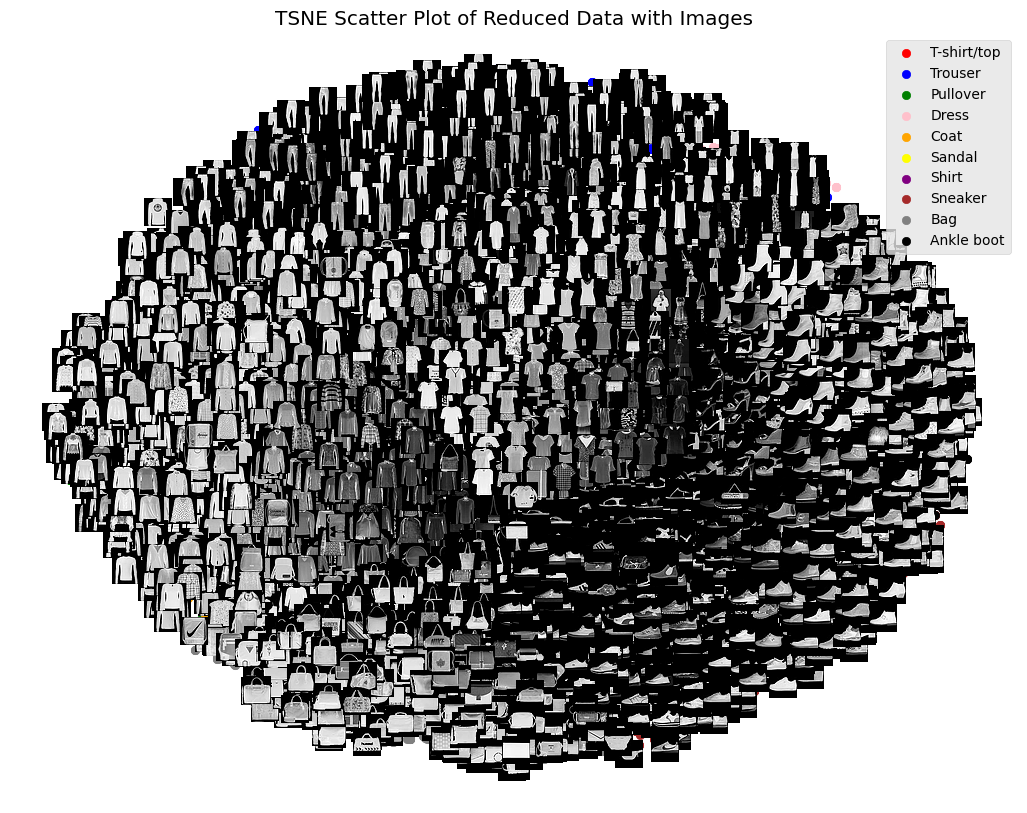

In [34]:
plot_scatter(X_embedded,'TSNE')

MDS PLOT

In [53]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2,n_jobs=-1,max_iter=100).fit_transform(X_train[:5000])
X_2D_MDS = pd.DataFrame(embedding,columns=['x','y'])

/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [55]:
def plot_scatter(reduced_data,name):
  image_labels=y_train[:5000].values.tolist()
  label_type = np.unique(image_labels)
  label_colors = {0: 'red', 2: 'green', 1: 'blue', 3: 'pink', 4: 'orange', 5: 'yellow', 6: 'purple', 7: 'brown', 8: 'grey', 9: 'black'}
  plt.figure(figsize=(13, 10))
  for lab in label_type:
      if lab== 0:
        lab_label='T-shirt/top'
      elif lab==1:
        lab_label='Trouser'
      elif lab==2:
        lab_label='Pullover'
      elif lab==3:
        lab_label='Dress'
      elif lab==4:
        lab_label='Coat'
      elif lab==5:
        lab_label='Sandal'
      elif lab==6:
        lab_label='Shirt'
      elif lab==7:
        lab_label='Sneaker'
      elif lab==8:
        lab_label='Bag'
      else:
        lab_label='Ankle boot'
      indices = np.where(image_labels == lab)
      plt.scatter(
          reduced_data[indices, 0],
          reduced_data[indices, 1],
          label=lab_label,
          color=label_colors[lab],
      )
      plt.axis("off")
      for i in indices[0]:
        if i % 8 == 0 :
                        image_path = X_train.iloc[i].to_numpy().reshape(28,28)
                        imagebox = OffsetImage(image_path, zoom=0.7,cmap='gray')
                        xy = reduced_data[i]
                        ab = AnnotationBbox(imagebox, xy, xycoords='data', boxcoords="data", frameon=False, arrowprops=dict(arrowstyle="->"))
                        plt.gca().add_artist(ab)
  plt.title(f'{name} Scatter Plot of Reduced Data with Images')
  plt.legend()
  plt.show()

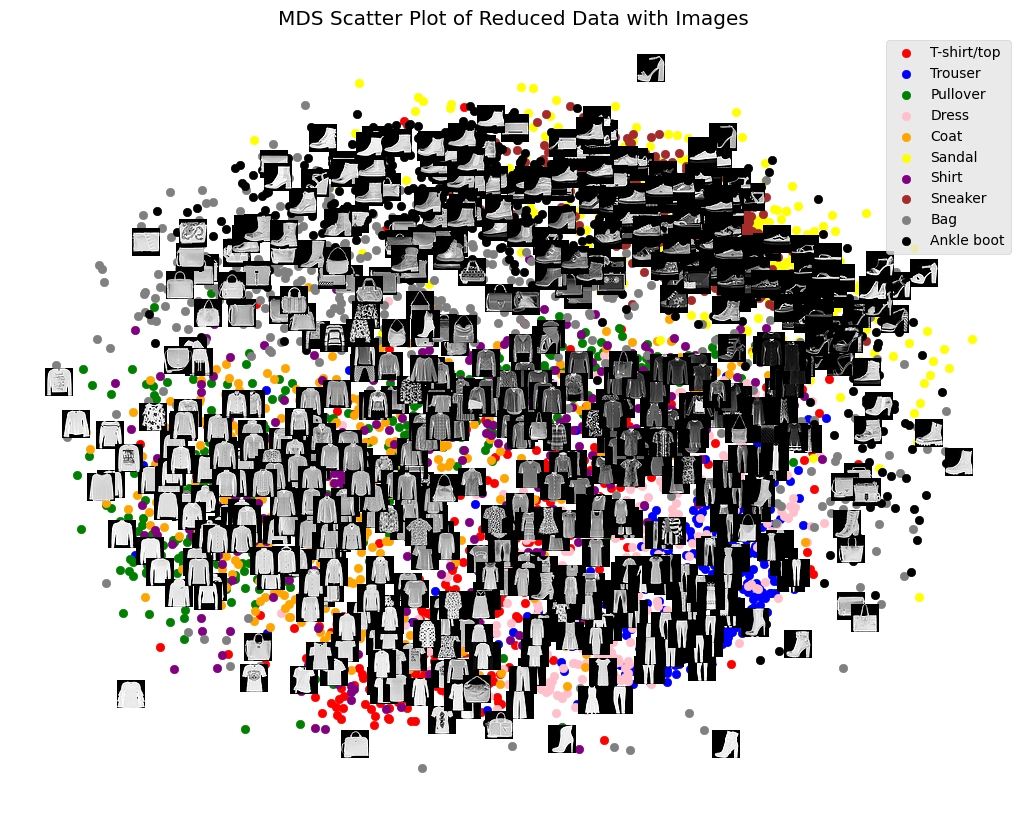

In [56]:
plot_scatter(embedding,'MDS')

c. Based on the problem statement of visualizing clusters of similar clothing items in the MNIST
Fashion dataset, t-SNE would likely be the most appropriate technique to use. This is because
t-SNE is particularly effective at preserving the local structure of the data, which is useful for
identifying clusters of similar items. In T-SNE we can see similar clusters forming a dense
structure. Additionally, t-SNE is a popular technique for visualizing and clustering high-
dimensional data, such as images, and has been shown to be effective in identifying patterns
and relationships between data points. It captures the local relationship in the high
dimensional space and tries to reproduce those weighted relation in a 2-d space. In images,
we have some overlap between similar images and also dissimilar images. So these local
relationships are essential to represent in lower dimension. Hence T-SNE does it well. PCA
captures the linear relationship as we are not using KernelPCA here, and it fails to capture the
non-linear relationship. Also, MDS is a linear technique hence it has those smae disadvantages
as PCA. LLE is a nonlinear method but it does not capture the local relationships.

## KMeans

### 5.Cluster the 360 images using K-Means.

A.To speed up the algorithm, use PCA to reduce the dimensionality of the dataset to two. Determine the number of clusters using one of the techniques we discussed in class.

In [65]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
train = pd.concat([X_train_scaled_df,y_train],axis=1)

sample_data = train.groupby('label').apply(lambda x:x.sample(frac=1/5)).reset_index(drop=True)

In [66]:
sample_data['label'].value_counts(normalize=True)

label
0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
Name: proportion, dtype: float64

In [67]:
sample_data = sample_data.sample(frac=1)
X_knn_train = sample_data[sample_data.columns[:-1]]
y_knn_train = sample_data['label']

In [68]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import silhouette_samples, silhouette_score
from tqdm import tqdm

In [69]:
num_clusters = [i for i in range(5,51)]

kmeans_dicts = {}
for clusters in tqdm(num_clusters):
    kmeans = KMeans(n_clusters=clusters,random_state=42)
    kmeans.fit(X_knn_train)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_knn_train, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_knn_train, cluster_labels)
    kmeans_dicts.update({str(clusters):[kmeans.inertia_,silhouette_avg,sample_silhouette_values]})

  0%|          | 0/46 [00:00<?, ?it/s]/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  2%|▏         | 1/46 [00:02<01:44,  2.32s/it]/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  4%|▍         | 2/46 [00:04<01:43,  2.34s/it]/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_

In [91]:
import pickle 

with open('KMeans.pkl', 'wb') as f:
    pickle.dump(kmeans_dicts, f)
        
with open('KMeans.pkl', 'rb') as f:
    kmeans_dicts = pickle.load(f)

In [92]:
inertia_vals = [val[0] for val in kmeans_dicts.values()]
silhoutte_coeffs = [val[1] for val in kmeans_dicts.values()]

Text(0.5, 1.0, 'Inertia Values vs. Number of Centroids')

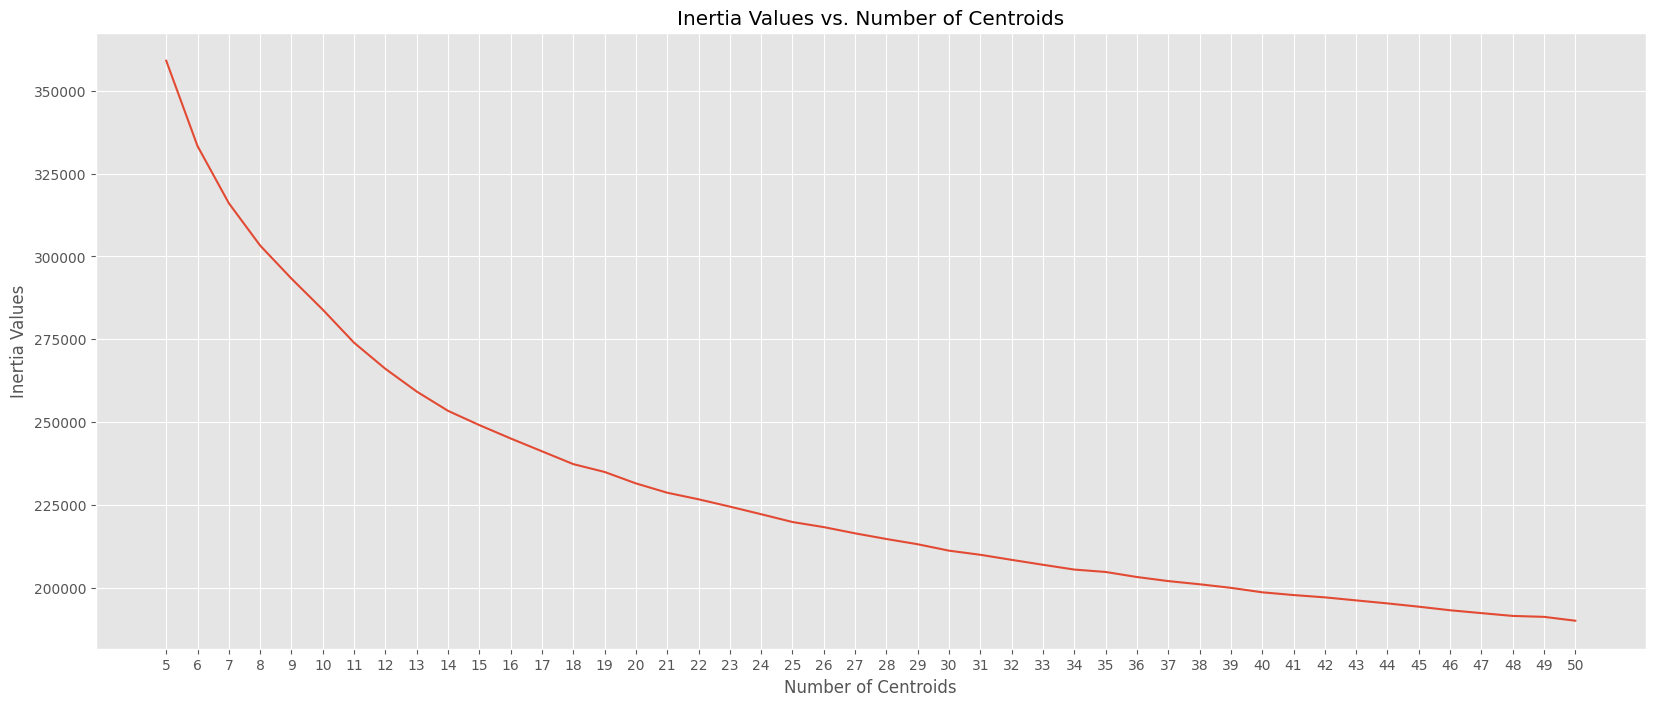

In [93]:
num_clusters = [str(i) for i in num_clusters]
plt.figure(figsize=(20,8))
plt.plot(num_clusters,inertia_vals)
plt.xlabel("Number of Centroids")
plt.ylabel("Inertia Values")
plt.title("Inertia Values vs. Number of Centroids")

Text(0.5, 1.0, 'Silhoutte Coefficients vs. Number of Centroids')

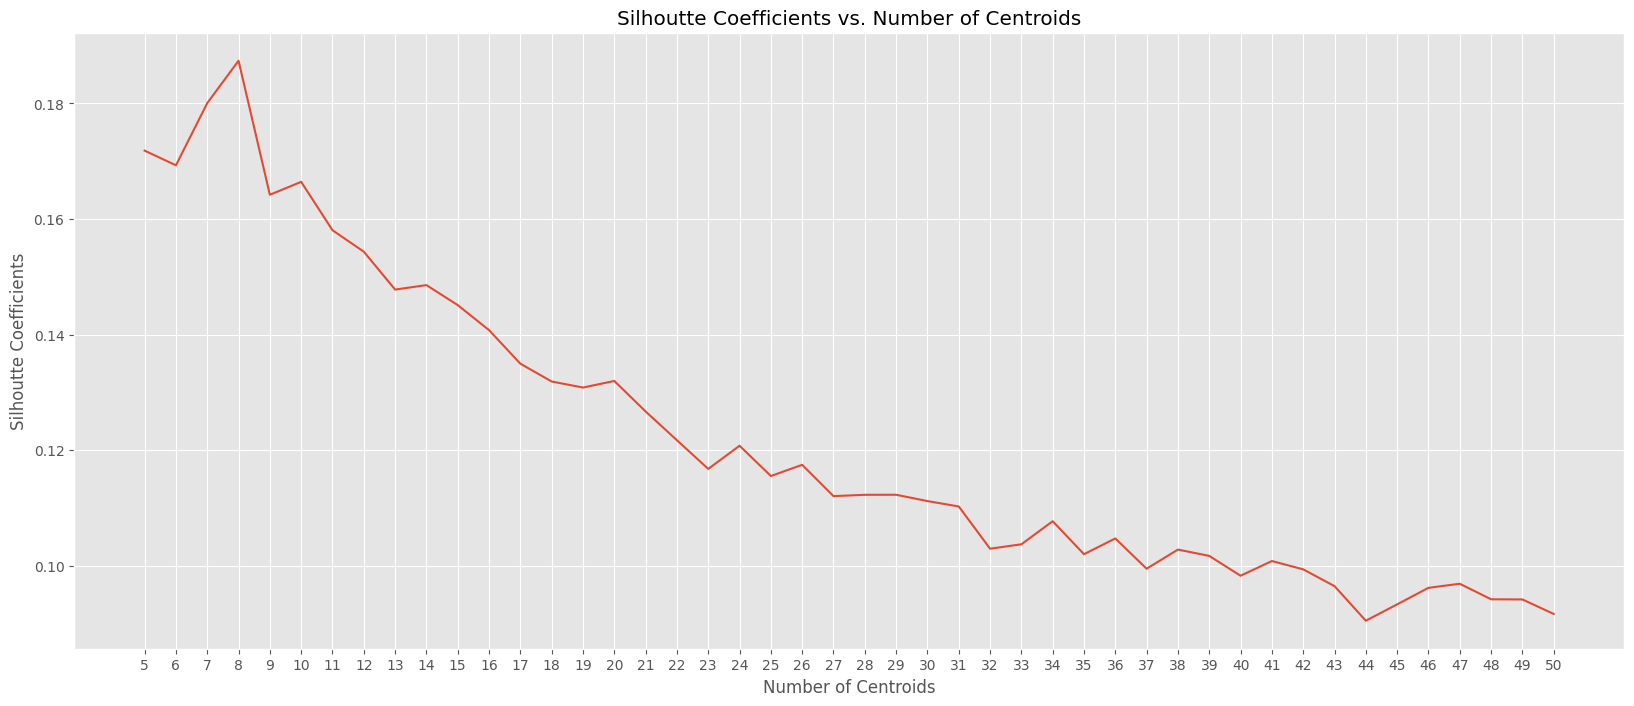

In [94]:
plt.figure(figsize=(20,8))
plt.plot(num_clusters,silhoutte_coeffs)
plt.xlabel("Number of Centroids")
plt.ylabel("Silhoutte Coefficients")
plt.title("Silhoutte Coefficients vs. Number of Centroids")

In [95]:
print(f"The best number of clusters is {5+np.argmax(silhoutte_coeffs)}")

The best number of clusters is 8


In [96]:
sample_data = train.groupby('label').apply(lambda x:x.sample(frac=1/50)).reset_index(drop=True)
sample_data = sample_data.sample(frac=1)
X_sub_knn_train = sample_data[sample_data.columns[:-1]]
y_sub_knn_train = sample_data['label']

In [97]:
import matplotlib.cm as cm

def plot_silhoutte(n_clusters:int,X):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer.fit(X_knn_train)
    cluster_labels = clusterer.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    for idx,y in enumerate(y_cols):
        ax2 = plt.gca()
        sub_df = sample_data[sample_data.label==idx]
        sub_vals = sub_df.values
        ax2.scatter(sub_vals[:,0],sub_vals[:,1],label=y, marker=".", s=30, lw=0, alpha=0.7, edgecolor="k")
   
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.legend()
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    plt.show()

/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.16877911427355244


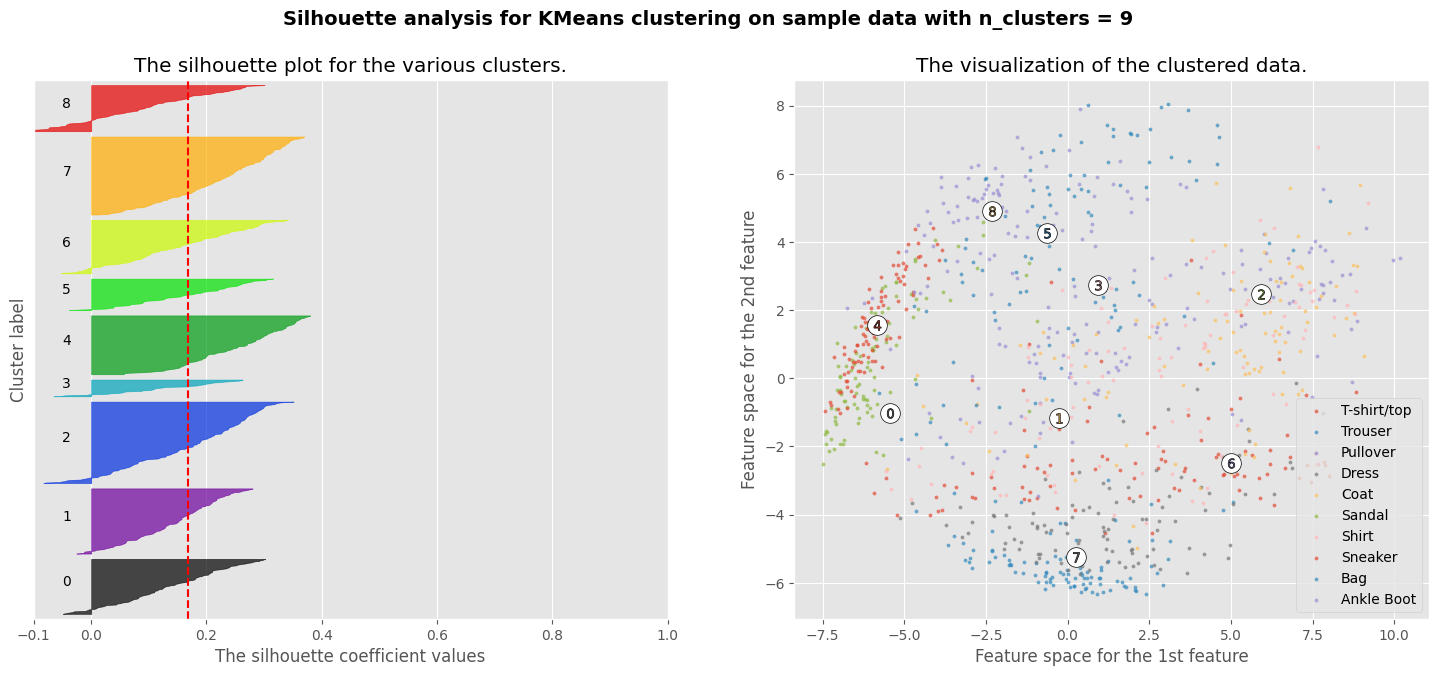

In [98]:
plot_silhoutte(9,X_sub_knn_train.values)

/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.19095993782887183


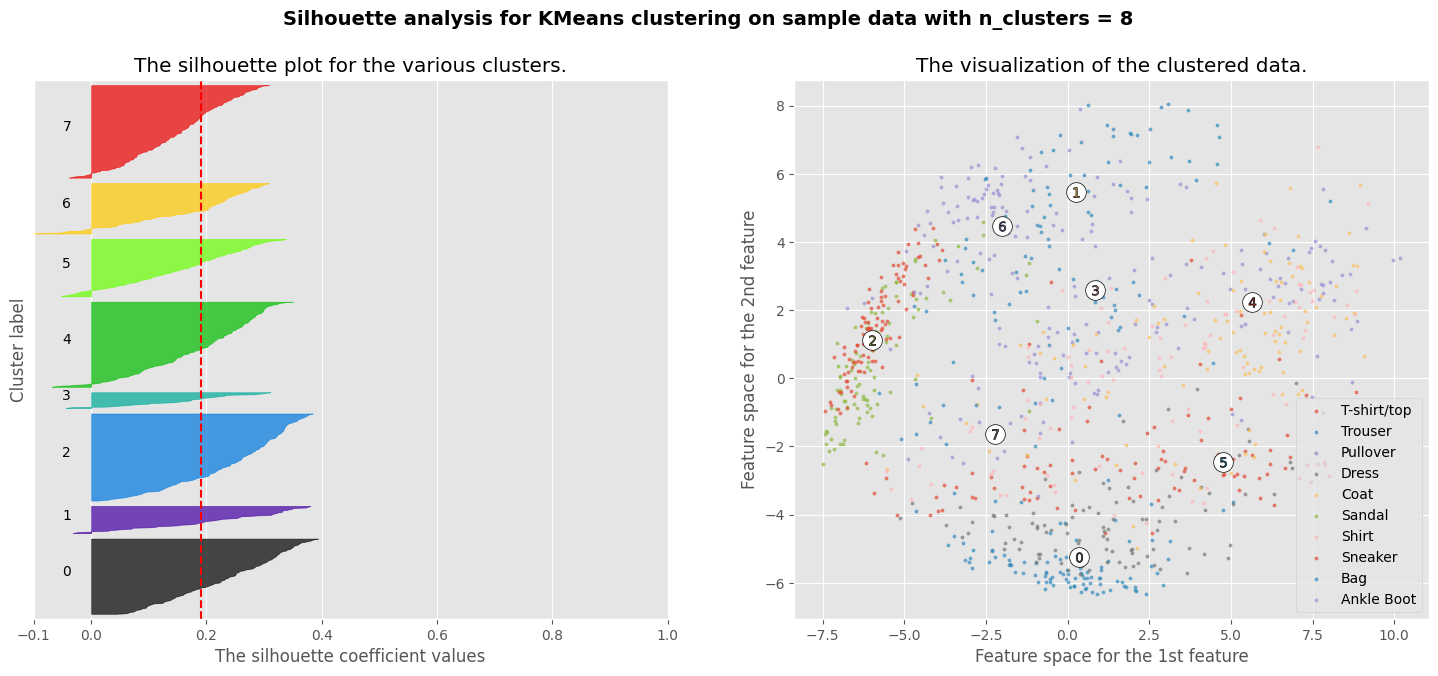

In [99]:
plot_silhoutte(8,X_sub_knn_train.values)

/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.1740937197550013


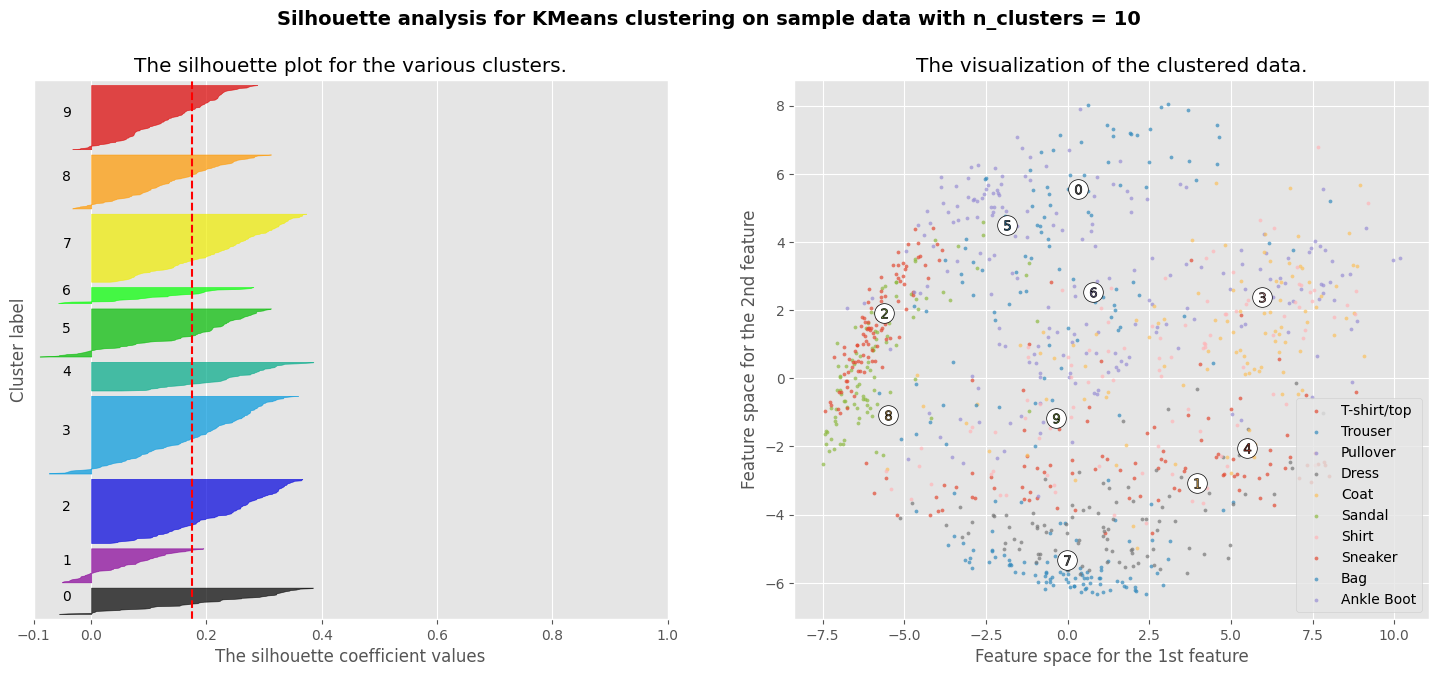

In [100]:
plot_silhoutte(10,X_sub_knn_train.values)

The graphs described above make it visually obvious that the ideal number of clusters appears
to have a more uniform cluster width than others.

B. VISUALIZE IN CLUSTERS IMAGES 

In [63]:
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [70]:
X_10k=X_2D_PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_10k) for k in range(1, 10)]
silhouette_scores = [silhouette_score(X_10k, model.labels_)
                     for model in kmeans_per_k[1:]]

/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

Text(0, 0.5, 'Silhouette score')

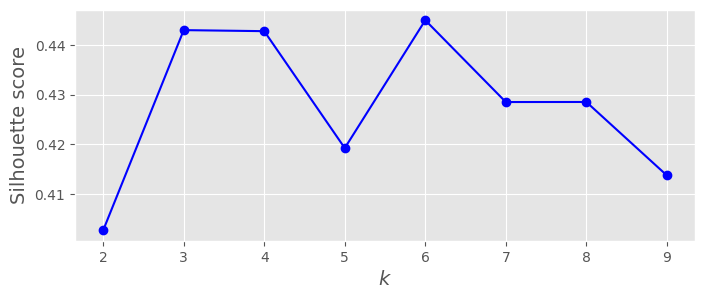

In [71]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10),silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

<ipython-input-63-afc7b47982ad>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-63-afc7b47982ad>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
<ipython-input-63-afc7b47982ad>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tr

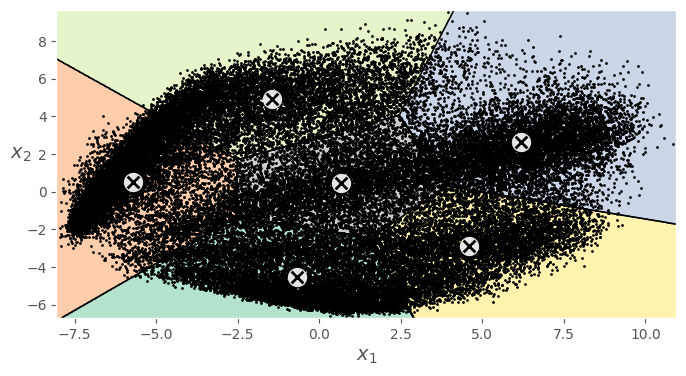

In [73]:
X=pd.DataFrame(X_10k)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_per_k[5],X)
plt.show()

In [75]:
ypred=kmeans_per_k[5].predict(X_10k)
x2=pd.DataFrame(X_10k)
x1=pd.DataFrame(ypred,columns=['cluster'])
X_10k_clus=pd.concat([x2,x1],axis=1)

<ipython-input-109-87795b38e5d3>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_10k_clus.loc[mask,'x'],X_10k_clus.loc[mask,'y'],s=10, c=colors[i], label=f'Class {i}')


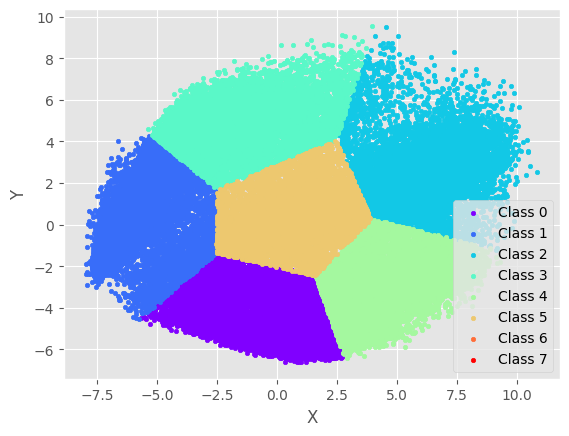

In [109]:
num_classes=8
colors = plt.cm.rainbow(np.linspace(0, 1, num_classes))
fig, ax = plt.subplots()
for i in range(num_classes):
    mask = x1['cluster'] == i
    ax.scatter(X_10k_clus.loc[mask,'x'],X_10k_clus.loc[mask,'y'],s=10, c=colors[i], label=f'Class {i}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

In [76]:
best_kmeans = KMeans(n_clusters=8)
best_kmeans.fit(X_knn_train)

cluster_labels = best_kmeans.predict(X_knn_train)

/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [77]:
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [78]:
knn_train_df = pd.DataFrame(X_knn_train,columns=[i for i in range(X_train_scaled.shape[1])])
knn_train_df['label'] = y_knn_train
knn_train_df['kmeans_label'] = cluster_labels

Cluster 0


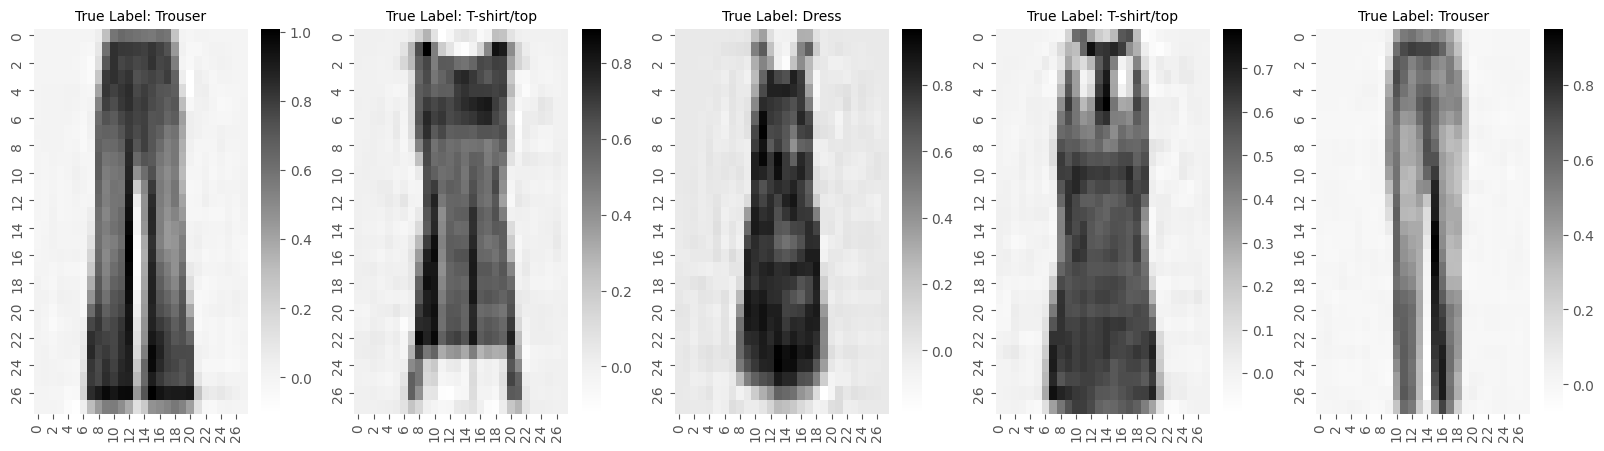

Cluster 1


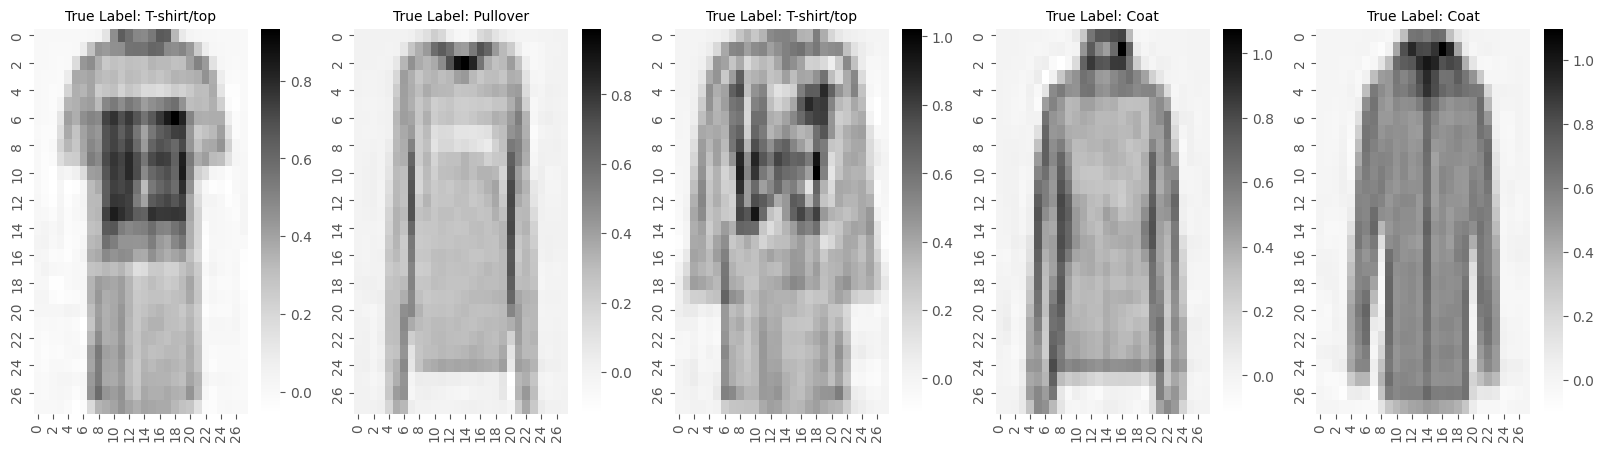

Cluster 2


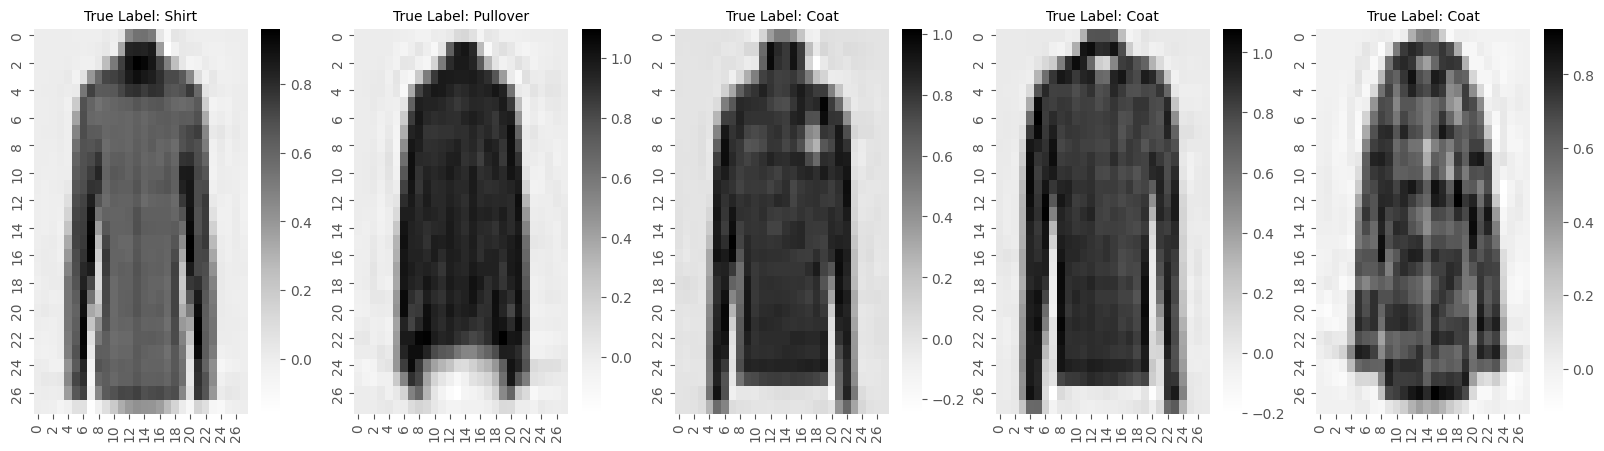

Cluster 3


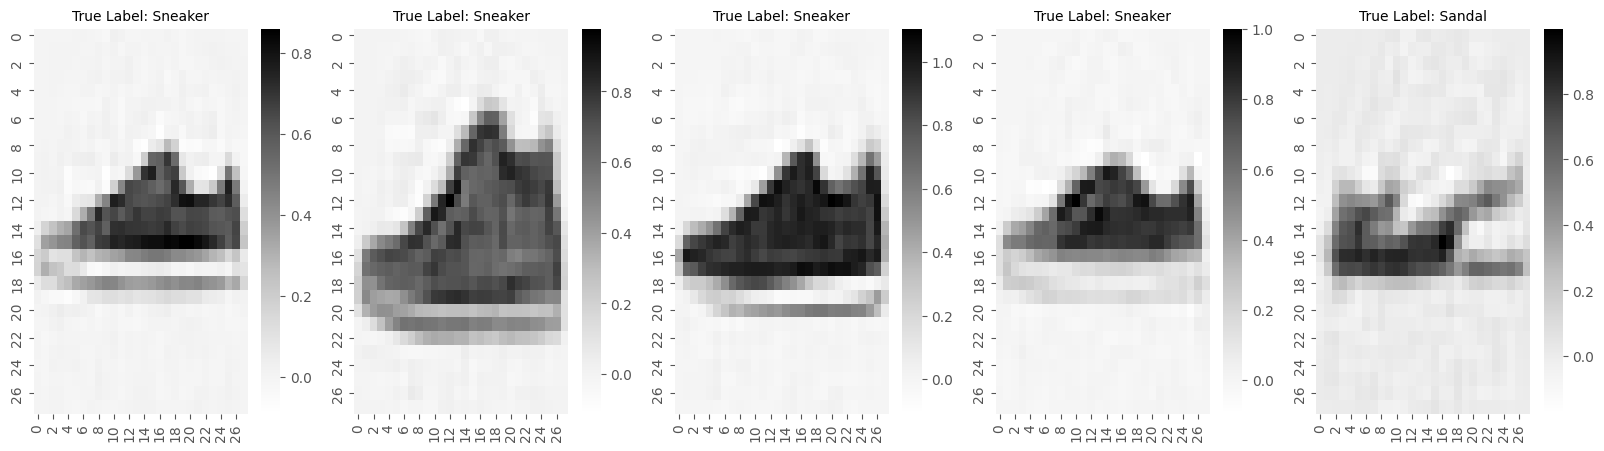

Cluster 4


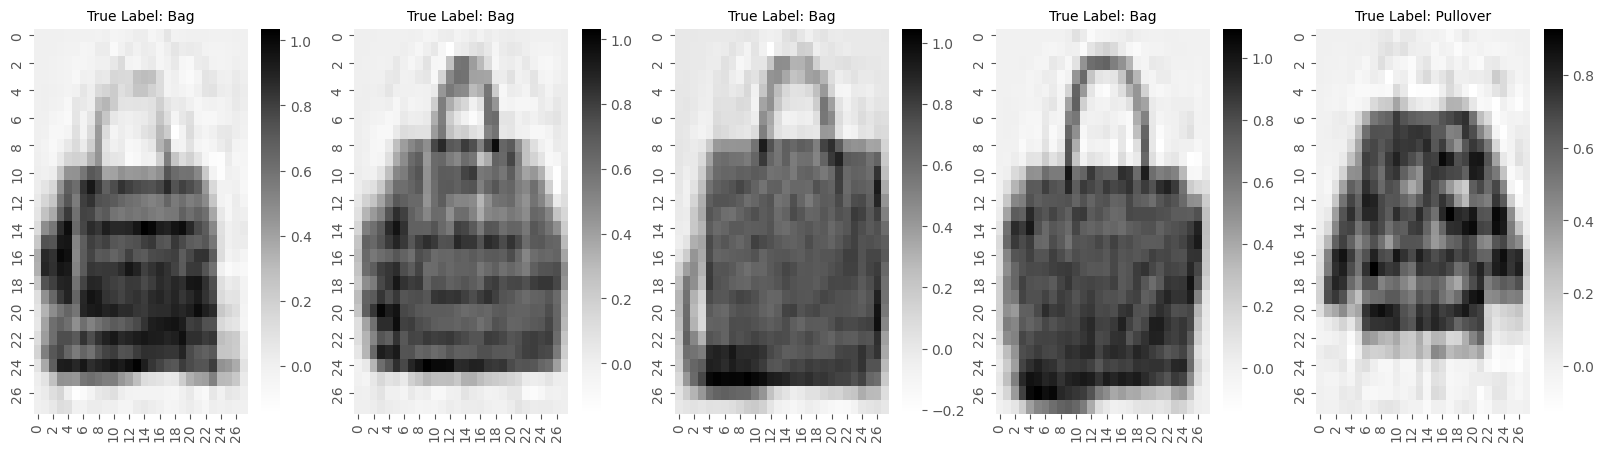

Cluster 5


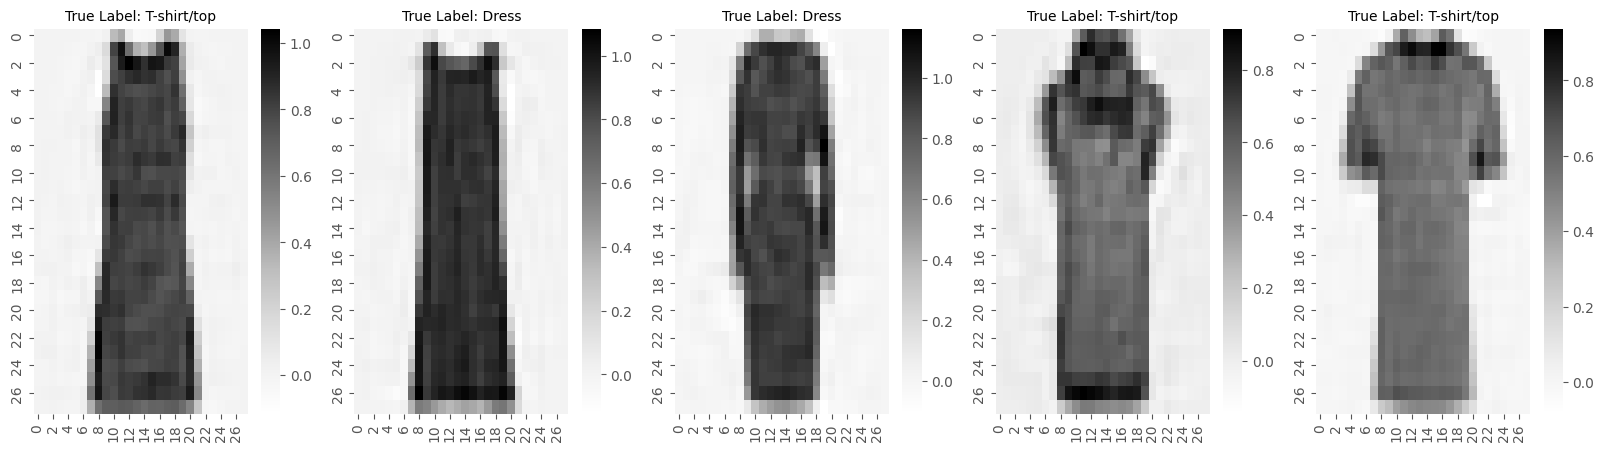

Cluster 6


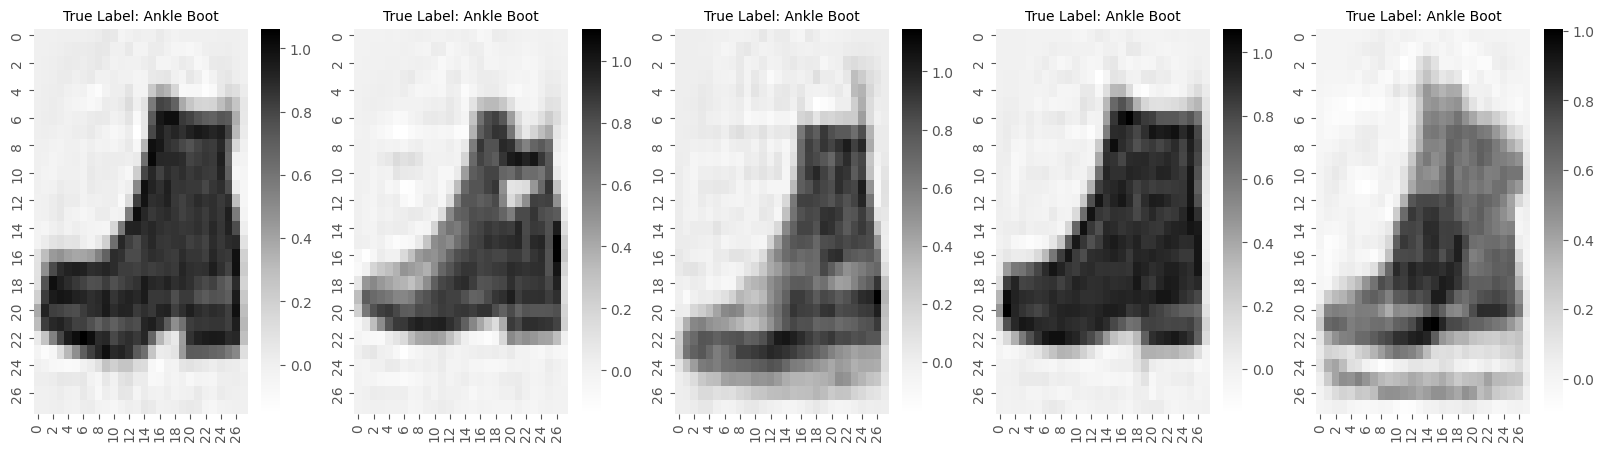

Cluster 7


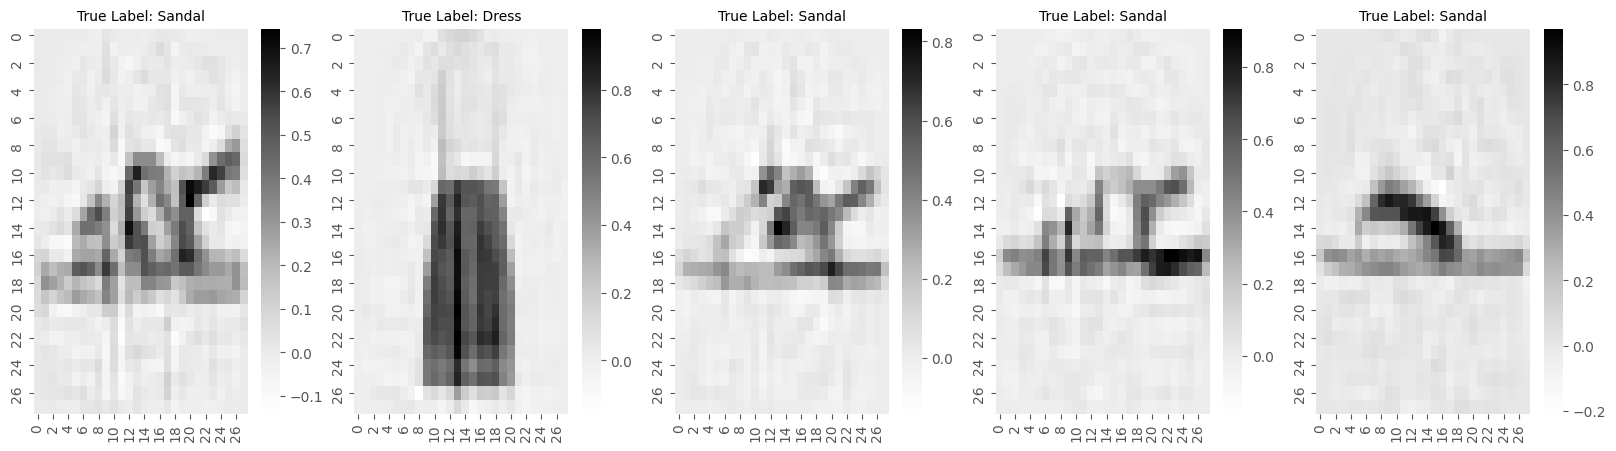

In [79]:
num_imgs = 5
for klabels in knn_train_df.groupby("kmeans_label"):
    klabels_ = klabels[1]
    X_vals = klabels_[klabels_.columns[:-2]].values
    X_vals = pca_trans.inverse_transform(X_vals)
    y_vals = klabels_['label'].values
    fig,ax = plt.subplots(1,num_imgs,figsize=(20,5))
    print(f"Cluster {klabels[0]}")
    for i in range(num_imgs):
        sns.heatmap(X_vals[i].reshape(28,28),cmap='Greys',ax=ax[i])
        ax[i].set_title(f"True Label: {y_cols[y_vals[i]]}",fontsize=10)
    plt.show()

In [80]:
ypred=kmeans_per_k[5].predict(X_10k)
x2=pd.DataFrame(X_10k)
x1=pd.DataFrame(ypred,columns=['cluster'])
X_10k_clus=pd.concat([x2,x1],axis=1)

<ipython-input-82-3cd92cb9d578>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_10k_clus.loc[mask,'x'],X_10k_clus.loc[mask,'y'],s=10, c=colors[i], label=f'Class {i}')


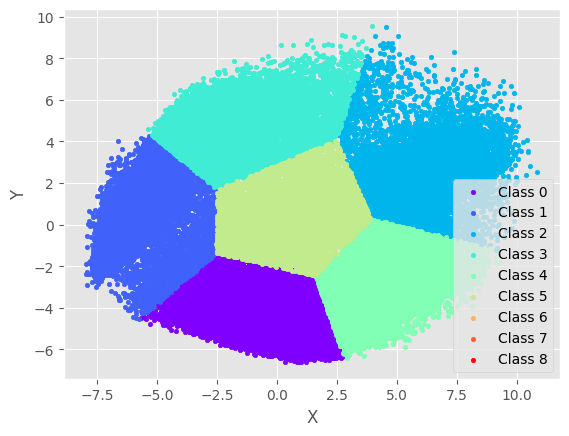

In [82]:
num_classes=9
colors = plt.cm.rainbow(np.linspace(0, 1, num_classes))
fig, ax = plt.subplots()
for i in range(num_classes):
    mask = x1['cluster'] == i
    ax.scatter(X_10k_clus.loc[mask,'x'],X_10k_clus.loc[mask,'y'],s=10, c=colors[i], label=f'Class {i}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

In [83]:
def plot_cluster_imgs(c):
    class_zero=X_10k_clus[X_10k_clus['cluster']==c]
    X_10k_recovered=pca_2D.inverse_transform(class_zero.iloc[:,:-1])
    random_rows_knn = [0,1,2,3,4,5,6,7,8]
    f, axarr = plt.subplots(3,3)
    axarr[0,0].imshow(X_10k_recovered[random_rows_knn[0]].reshape((28,28)))
    axarr[0,1].imshow(X_10k_recovered[random_rows_knn[1]].reshape((28,28)))
    axarr[0,2].imshow(X_10k_recovered[random_rows_knn[2]].reshape((28,28 )))
    axarr[1,0].imshow(X_10k_recovered[random_rows_knn[3]].reshape((28,28)))
    axarr[1,1].imshow(X_10k_recovered[random_rows_knn[4]].reshape((28,28)))
    axarr[1,2].imshow(X_10k_recovered[random_rows_knn[5]].reshape((28,28)))
    axarr[2,0].imshow(X_10k_recovered[random_rows_knn[6]].reshape((28,28)))
    axarr[2,1].imshow(X_10k_recovered[random_rows_knn[7]].reshape((28,28)))
    axarr[2,2].imshow(X_10k_recovered[random_rows_knn[8]].reshape((28,28)))

In [84]:
def plot_cluster_imgs_originals(c):
    k=X_train[:10000]
    data_ori=pd.DataFrame(k[X_10k_clus['cluster']==c])
    f, axarr = plt.subplots(3,3)
    axarr[0,0].imshow(np.asarray(list(data_ori.iloc[0,:])).reshape((28,28)))
    axarr[0,1].imshow(np.asarray(list(data_ori.iloc[1,:])).reshape((28,28)))
    axarr[0,2].imshow(np.asarray(list(data_ori.iloc[2,:])).reshape((28,28)))
    axarr[1,0].imshow(np.asarray(list(data_ori.iloc[3,:])).reshape((28,28)))
    axarr[1,1].imshow(np.asarray(list(data_ori.iloc[4,:])).reshape((28,28)))
    axarr[1,2].imshow(np.asarray(list(data_ori.iloc[5,:])).reshape((28,28)))
    axarr[2,0].imshow(np.asarray(list(data_ori.iloc[6,:])).reshape((28,28)))
    axarr[2,1].imshow(np.asarray(list(data_ori.iloc[7,:])).reshape((28,28)))
    axarr[2,2].imshow(np.asarray(list(data_ori.iloc[8,:])).reshape((28,28)))

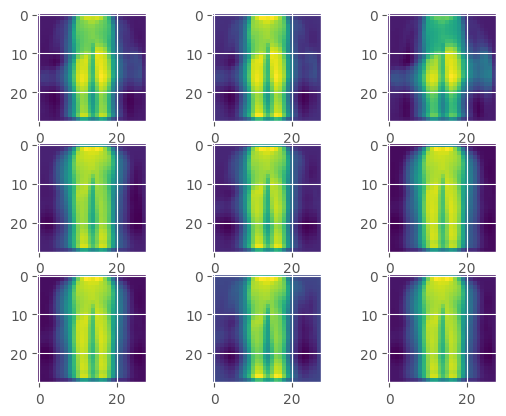

In [85]:
plot_cluster_imgs(0)

<ipython-input-84-b39bff5971d8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_ori=pd.DataFrame(k[X_10k_clus['cluster']==c])


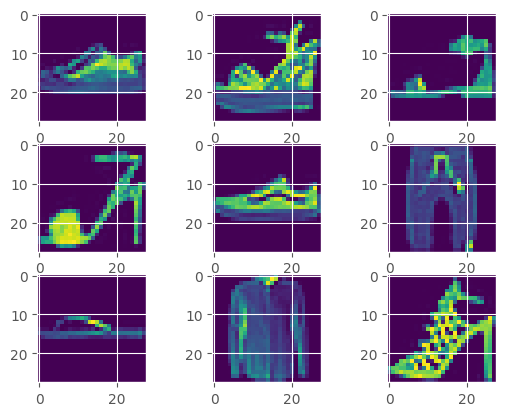

In [86]:
plot_cluster_imgs_originals(1)

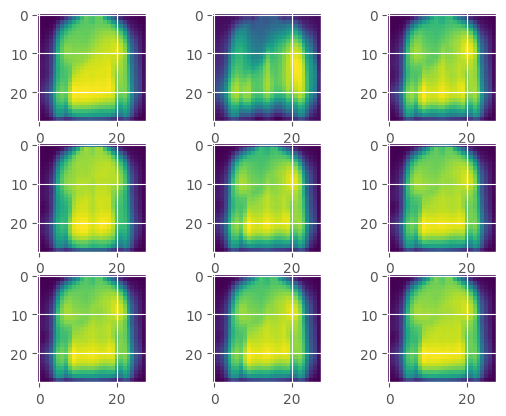

In [87]:
plot_cluster_imgs(2)

<ipython-input-84-b39bff5971d8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_ori=pd.DataFrame(k[X_10k_clus['cluster']==c])


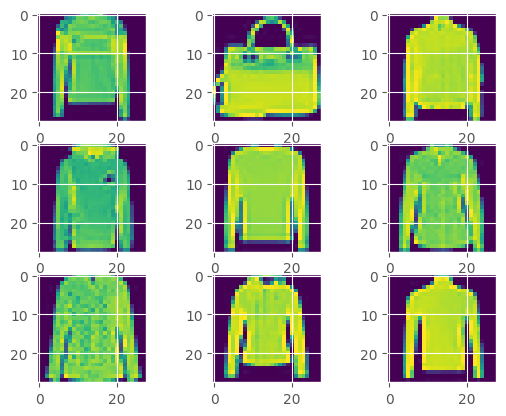

In [88]:
plot_cluster_imgs_originals(2)

### 6.Cluster the 360 images using EM.


A.Same as in the previous question, to speed up the algorithm, use PCA to reduce the dimensionality of the dataset to two. Determine the number of clusters using one of the techniques we discussed in class.

GAUSSIAN MIXTURE MODELS

In [117]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
train = pd.concat([X_train_scaled_df,y_train],axis=1)
sample_data_gmm = train.groupby('label').apply(lambda x:x.sample(frac=1/5,random_state=42)).reset_index(drop=True)
X_sub_gmm = sample_data_gmm[sample_data_gmm.columns[:-1]]
y_sub_gmm = sample_data_gmm['label']

In [118]:
from sklearn.mixture import GaussianMixture

gmm_full = GaussianMixture(n_components=10,n_init=5,covariance_type="full")
gmm_diag = GaussianMixture(n_components=10,n_init=5,covariance_type="diag")
gmm_tied = GaussianMixture(n_components=10,n_init=5,covariance_type="tied")
gmm_spherical = GaussianMixture(n_components=10,n_init=5,covariance_type="spherical")

In [119]:
def save_dictionary(name:str,dicts_):
    import pickle 

    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(dicts_, f)
def read_dictionary(name:str):        
    with open(f'{name}.pkl', 'rb') as f:
        dicts_ = pickle.load(f)
    return dicts_

In [120]:
from tqdm import tqdm
def get_gaussian_mixture(k_min=5,k_max=20,covariance_type='full'):
    model_gmms = {}
    model_bics = {}
    model_aics = {}
    for n_components in tqdm(range(k_min,k_max+1)):
        gmm_model = GaussianMixture(n_components=n_components,covariance_type=covariance_type,n_init=5).fit(X_sub_gmm)
        model_gmms.update({str(n_components):gmm_model})
        model_bics.update({str(n_components):gmm_model.bic(X_sub_gmm)})
        model_aics.update({str(n_components):gmm_model.aic(X_sub_gmm)})
    plt.figure(figsize=(20,8))
    plt.plot(model_bics.keys(),model_bics.values(),label='BIC')
    plt.plot(model_aics.keys(),model_aics.values(),label='AIC')
    plt.ylabel('Information Criterion')
    plt.xlabel("Number of Clusters")
    plt.legend()
    plt.title(f'{covariance_type} GMM model')
    plt.show()
    
    plt.savefig(f'{covariance_type}.png')

    return model_gmms,model_bics,model_aics

100%|██████████| 16/16 [10:42<00:00, 40.16s/it]


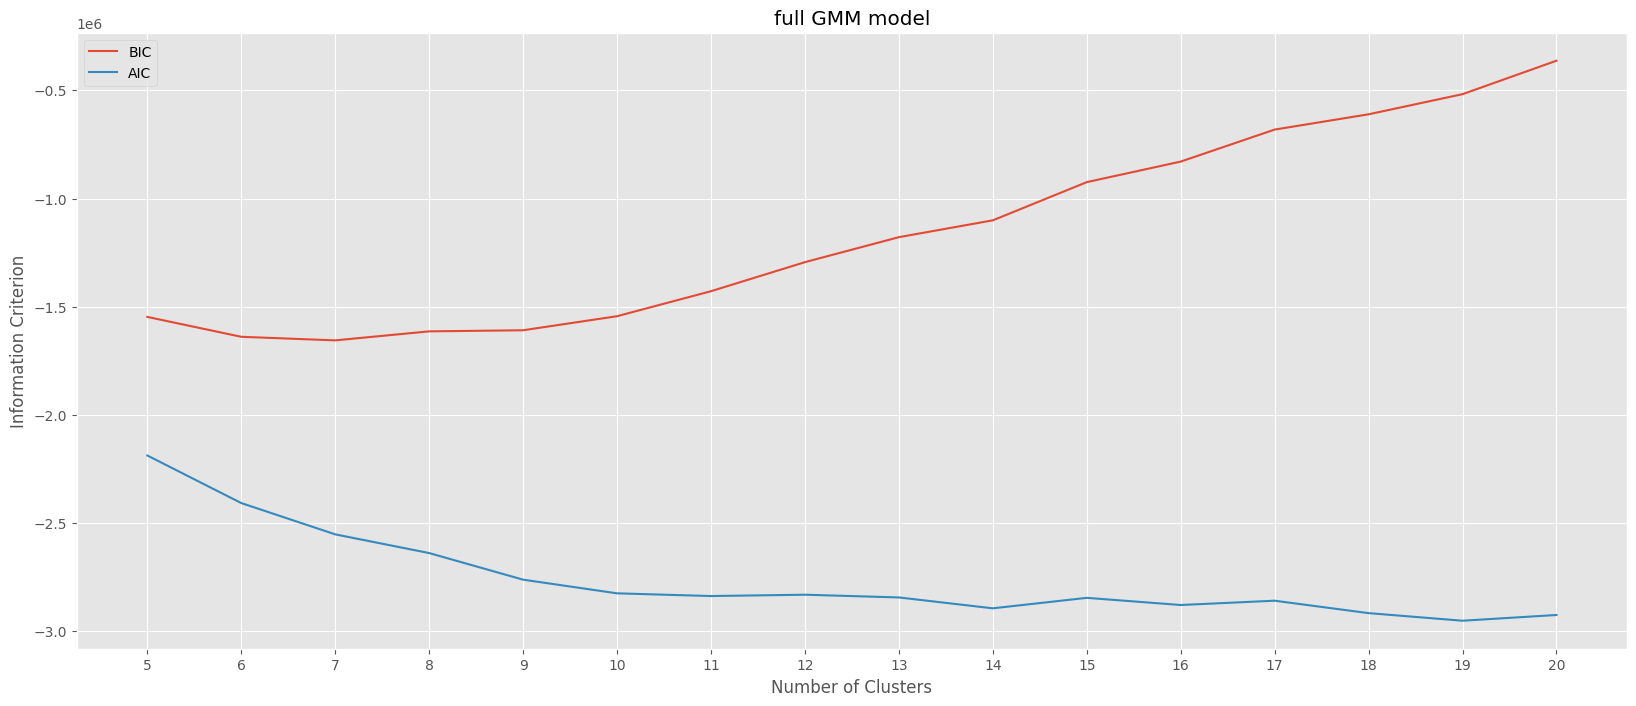

<Figure size 640x480 with 0 Axes>

In [121]:
#This cell took around 32 minutes to run, the output was cleared during plotting
full_model_gmm,full_bic,full_aic = get_gaussian_mixture(k_min=5,k_max=20)

100%|██████████| 16/16 [00:27<00:00,  1.74s/it]


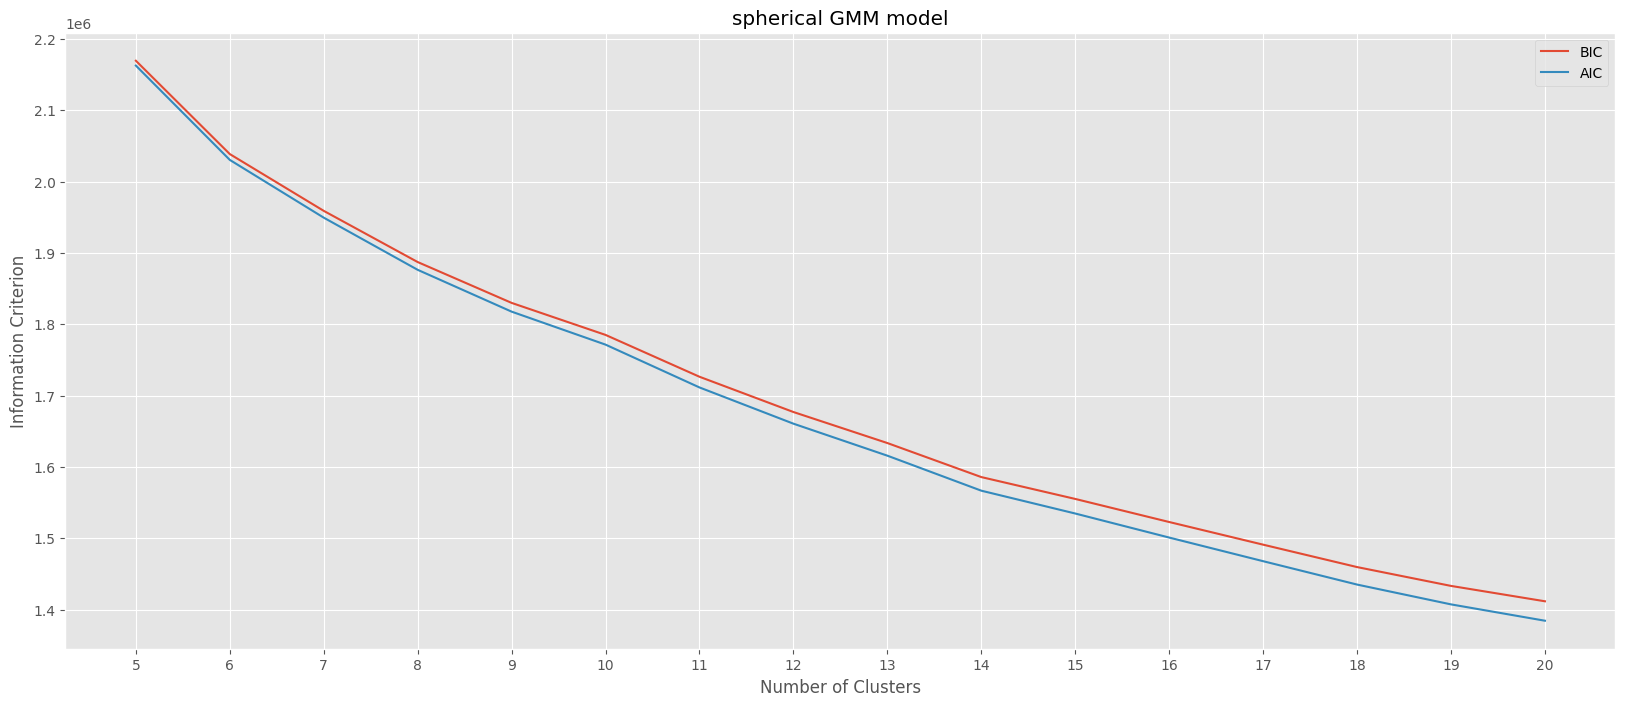

<Figure size 640x480 with 0 Axes>

In [122]:
#48 seconds
spherical_model_gmm,spherical_bic,spherical_aic = get_gaussian_mixture(k_min=5,k_max=20,covariance_type='spherical')

save_dictionary('AIC_SPHERICAL',spherical_aic)
save_dictionary('BIC_SPHERICAL',spherical_bic)

100%|██████████| 16/16 [00:45<00:00,  2.82s/it]


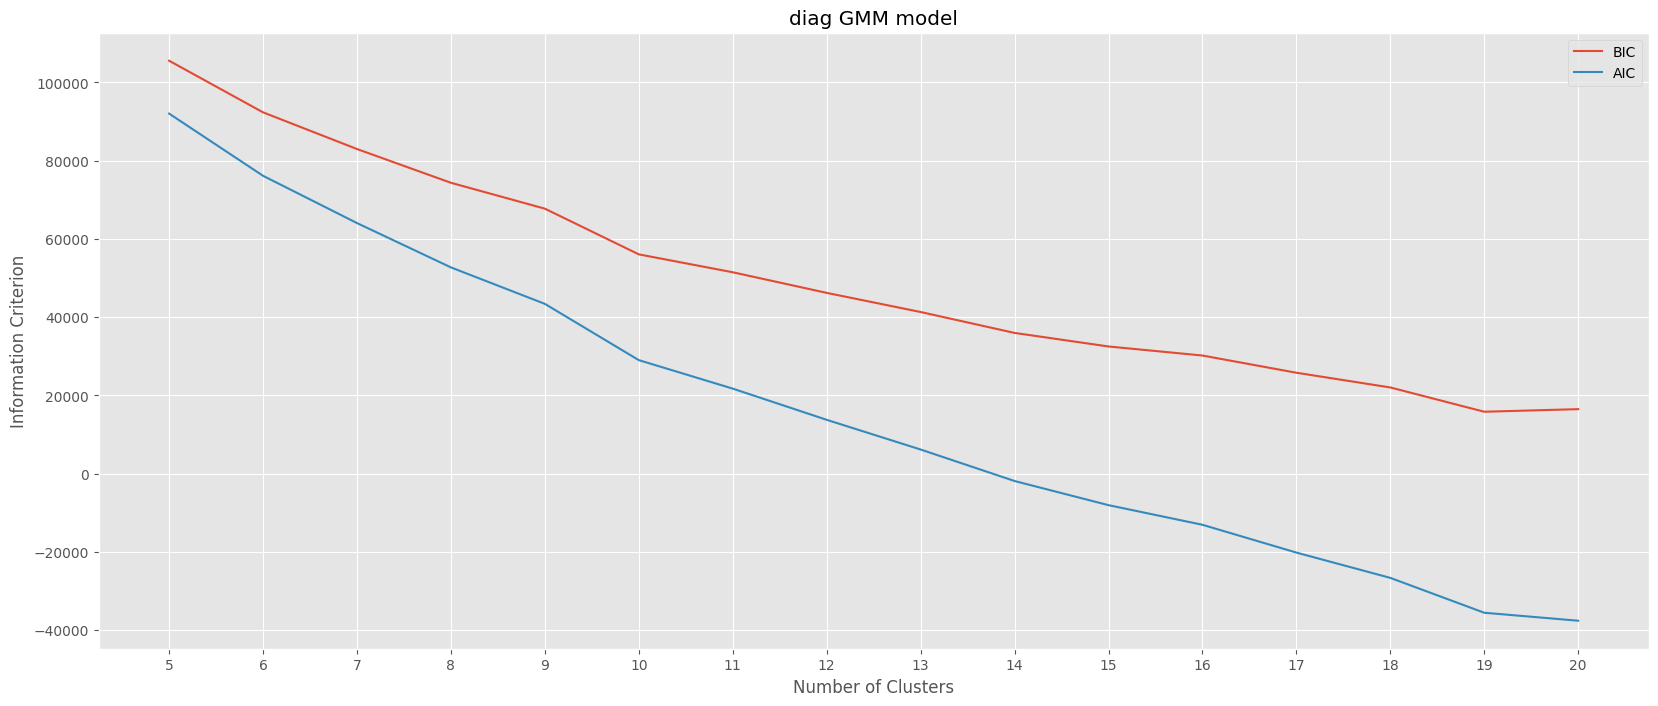

<Figure size 640x480 with 0 Axes>

In [123]:
#2 mniutes 8 seconds
diag_model_gmm,diag_bic,diag_aic = get_gaussian_mixture(k_min=5,k_max=20,covariance_type='diag')

save_dictionary('AIC_DIAG',diag_aic)
save_dictionary('BIC_DIAG',diag_bic)

100%|██████████| 16/16 [08:09<00:00, 30.59s/it]


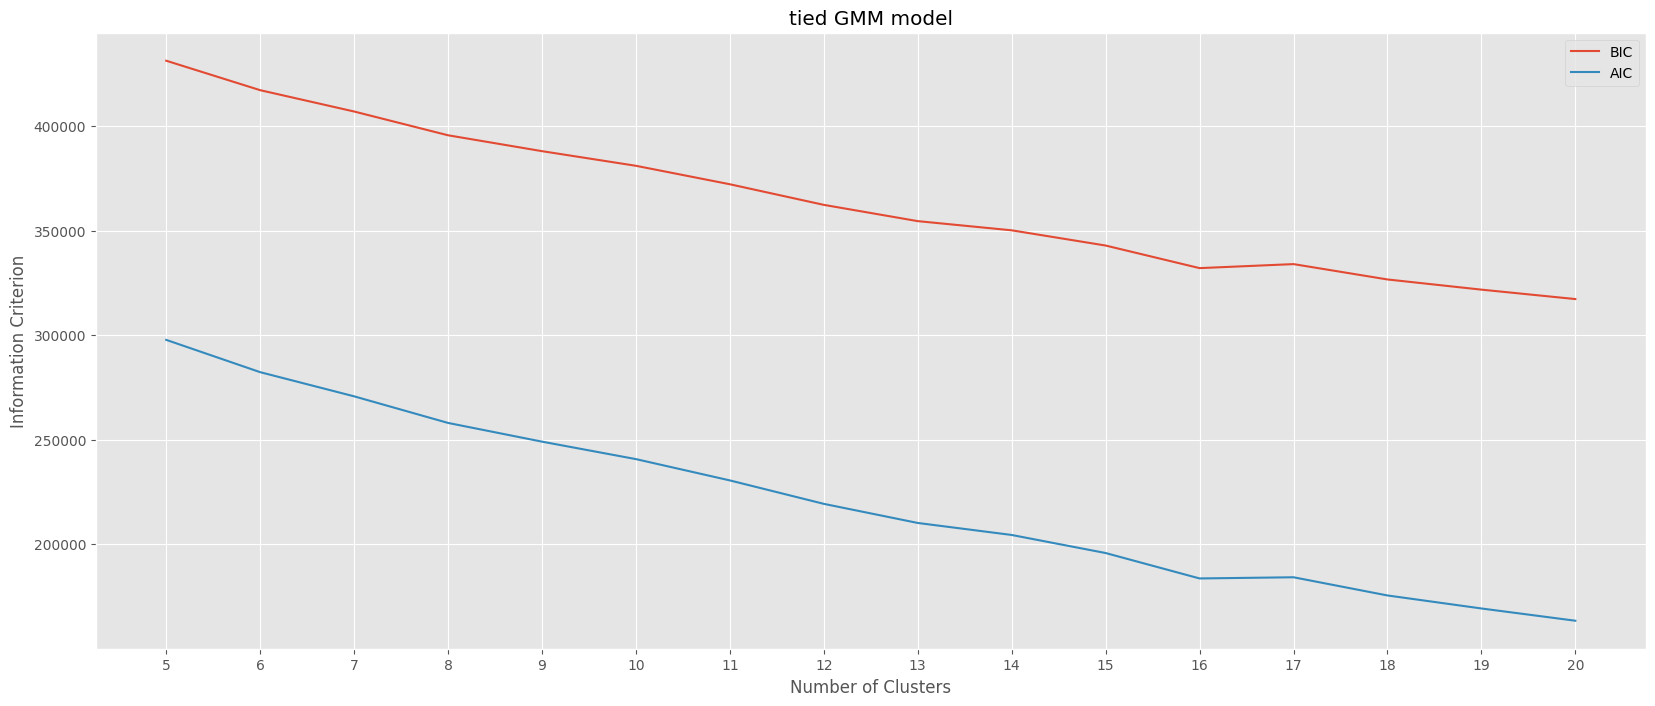

<Figure size 640x480 with 0 Axes>

In [124]:
tied_model_gmm,tied_bic,tied_aic = get_gaussian_mixture(k_min=5,k_max=20,covariance_type='tied')

save_dictionary('AIC_TIED',tied_aic)
save_dictionary('BIC_TIED',tied_bic)

##### THE `COVARIANCE_TYPE=FULL` GAVE THE BEST RESULTS WITH NUMBER OF `CLUSTERS=9`

B.Visualize the clusters



In [89]:
from sklearn.mixture import GaussianMixture
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X_10k)
             for k in range(1, 17)]

<ipython-input-92-1fcc141c99a5>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-92-1fcc141c99a5>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/prajwal/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was 

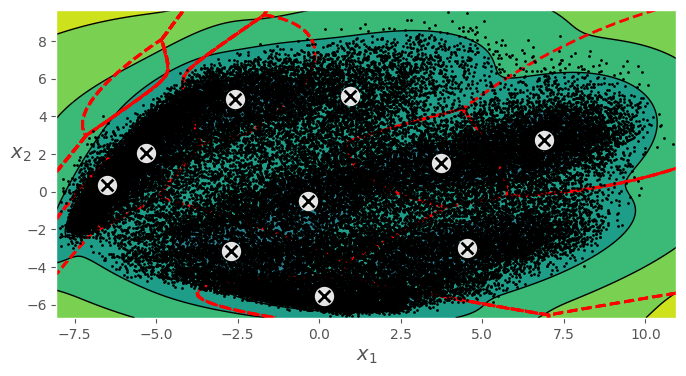

In [92]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    X=pd.DataFrame(X)
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gms_per_k[9], X_10k)

plt.show()

In [93]:
ypred_gms=gms_per_k[11].predict(X_10k)
x2_gm=pd.DataFrame(X_10k)
x1_gm=pd.DataFrame(ypred_gms,columns=['cluster'])
X_10k_clus_gms=pd.concat([x2_gm,x1_gm],axis=1)

<ipython-input-94-7ba42e210130>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_10k_clus_gms.loc[mask,'x'],X_10k_clus_gms.loc[mask,'y'],s=5, c=colors[i], label=f'Class {i}')


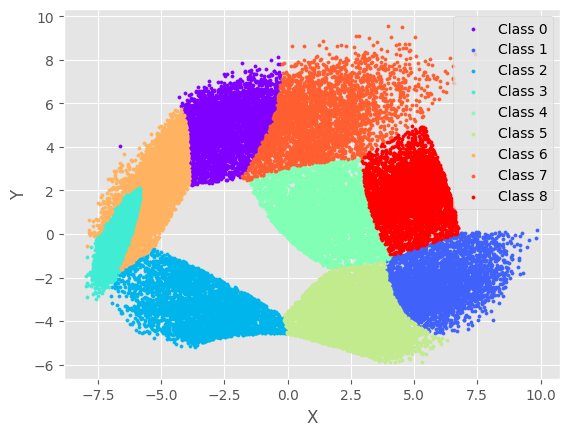

In [94]:
num_classes=9
colors = plt.cm.rainbow(np.linspace(0, 1, num_classes))
fig, ax = plt.subplots()
for i in range(num_classes):
    mask = x1_gm['cluster'] == i
    ax.scatter(X_10k_clus_gms.loc[mask,'x'],X_10k_clus_gms.loc[mask,'y'],s=5, c=colors[i], label=f'Class {i}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

C.Use the model to generate 20 new rocks

In [125]:
best_gmm_model_full = GaussianMixture(n_components=9,n_init=5).fit(X_sub_gmm)

In [126]:
gmm_samples = best_gmm_model_full.sample(20)
X_sample,y_sample = gmm_samples

In [127]:
X_sample_recoverd = pca_trans.inverse_transform(X_sample)

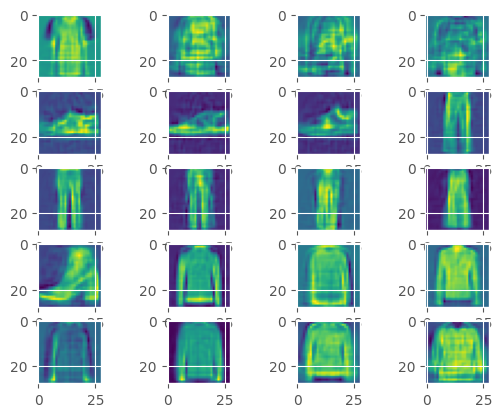

In [138]:
f, axarr = plt.subplots(5,4)
idx=0
for i in range(5):
    for j in range(4):
        axarr[i,j].imshow(X_sample_recoverd[idx].reshape((28,28)))
        idx+=1

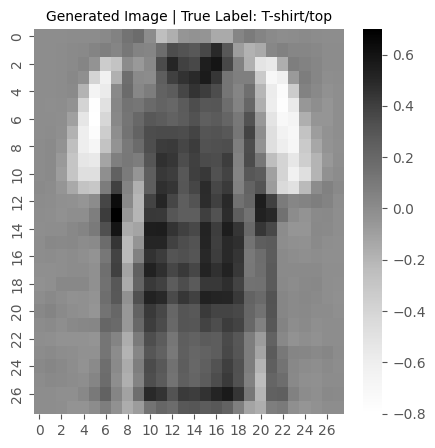

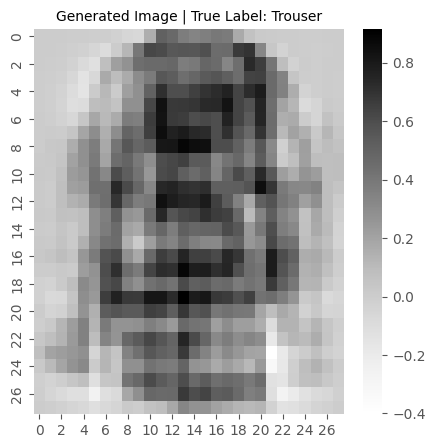

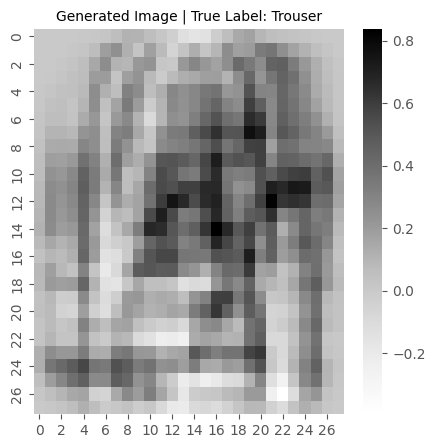

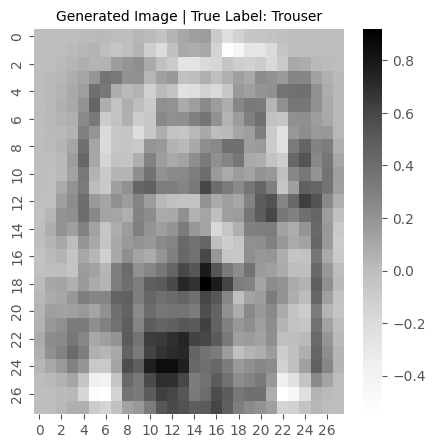

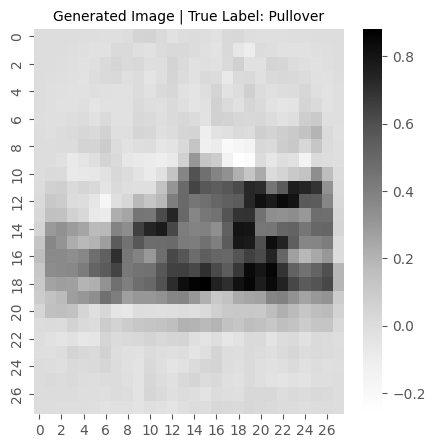

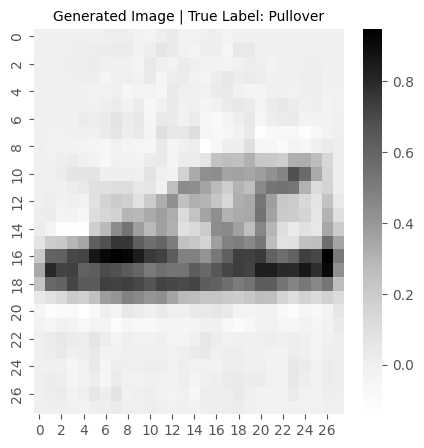

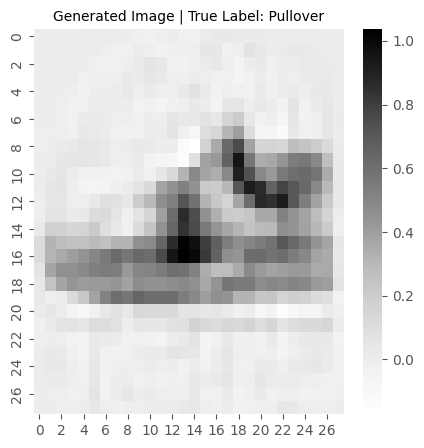

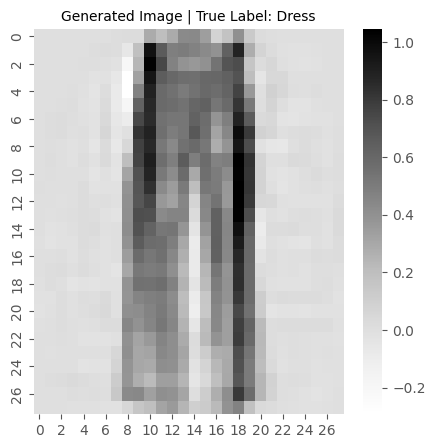

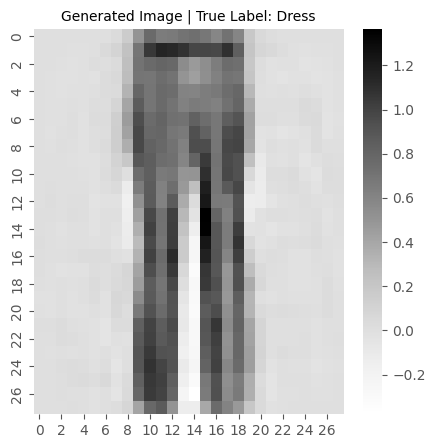

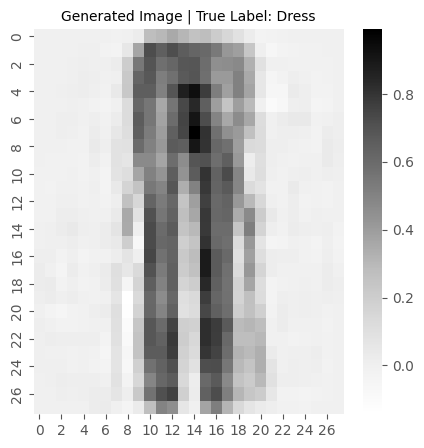

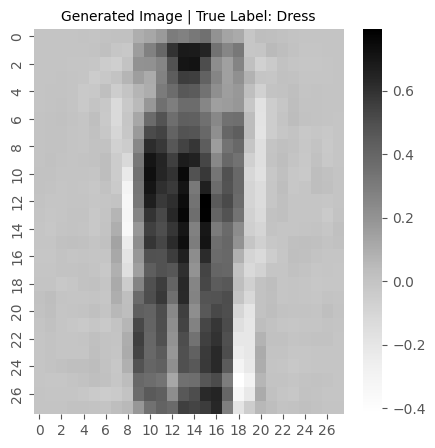

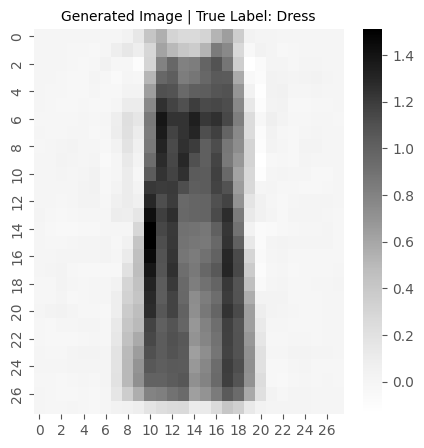

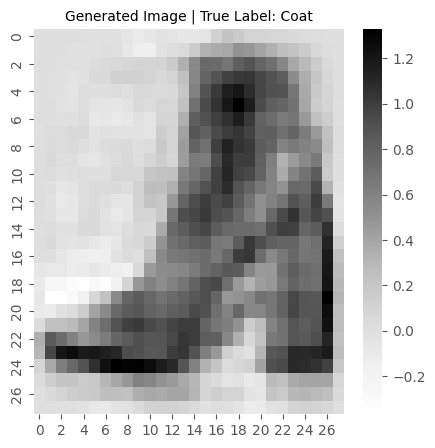

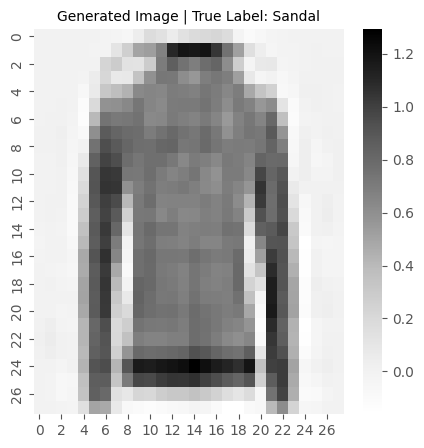

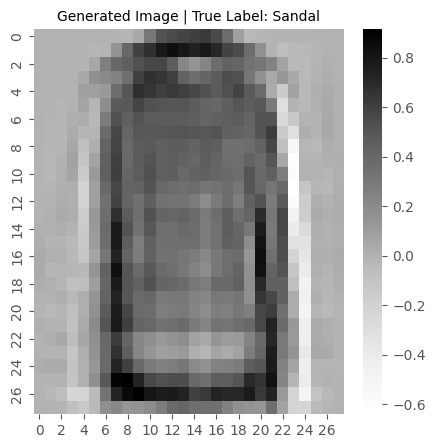

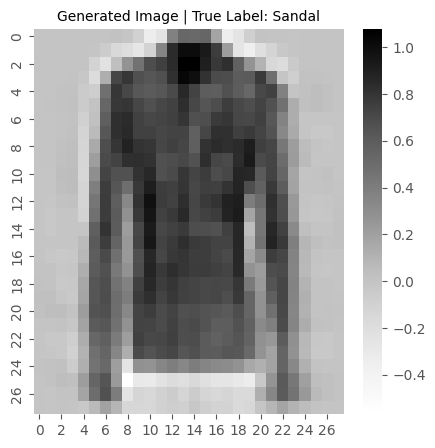

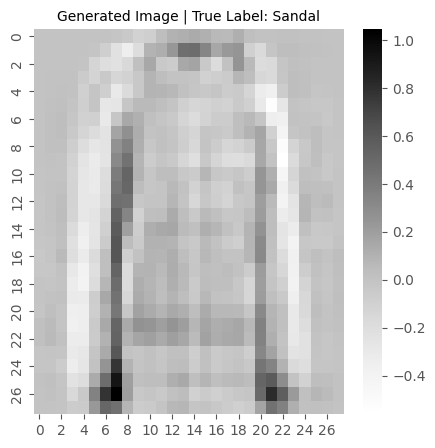

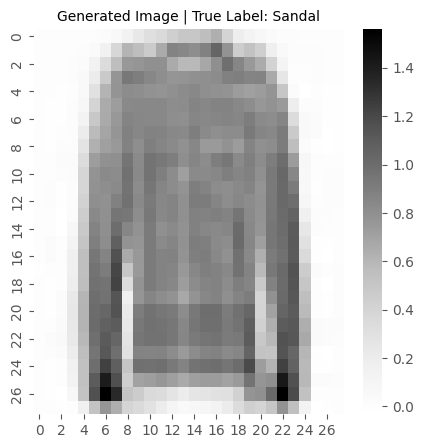

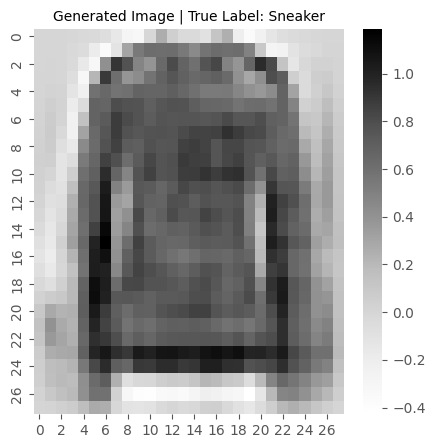

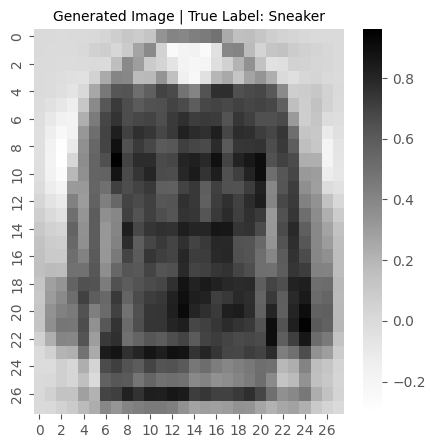

In [128]:
for idx in range(20):
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    sns.heatmap(X_sample_recoverd[idx].reshape(28,28),ax=axs,cmap='Greys')
    axs.set_title(f"Generated Image | True Label: {y_cols[y_sample[idx]]}",fontsize=10)

In [129]:
gmm_plot_df = pd.concat([X_sub_gmm,y_sub_gmm],axis=1)
gmm_plot_df = gmm_plot_df.sample(frac=0.1,random_state=42)
X_gmm_plot = gmm_plot_df[gmm_plot_df.columns[:-1]]
y_gmm_plot = gmm_plot_df['label']

In [130]:
gmm_plot_df['gmm_predicted_label'] = best_gmm_model_full.predict(X_gmm_plot)

In [131]:
num_clusters = 9

y_gmm_cols = [str(i) for i in range(num_clusters)]

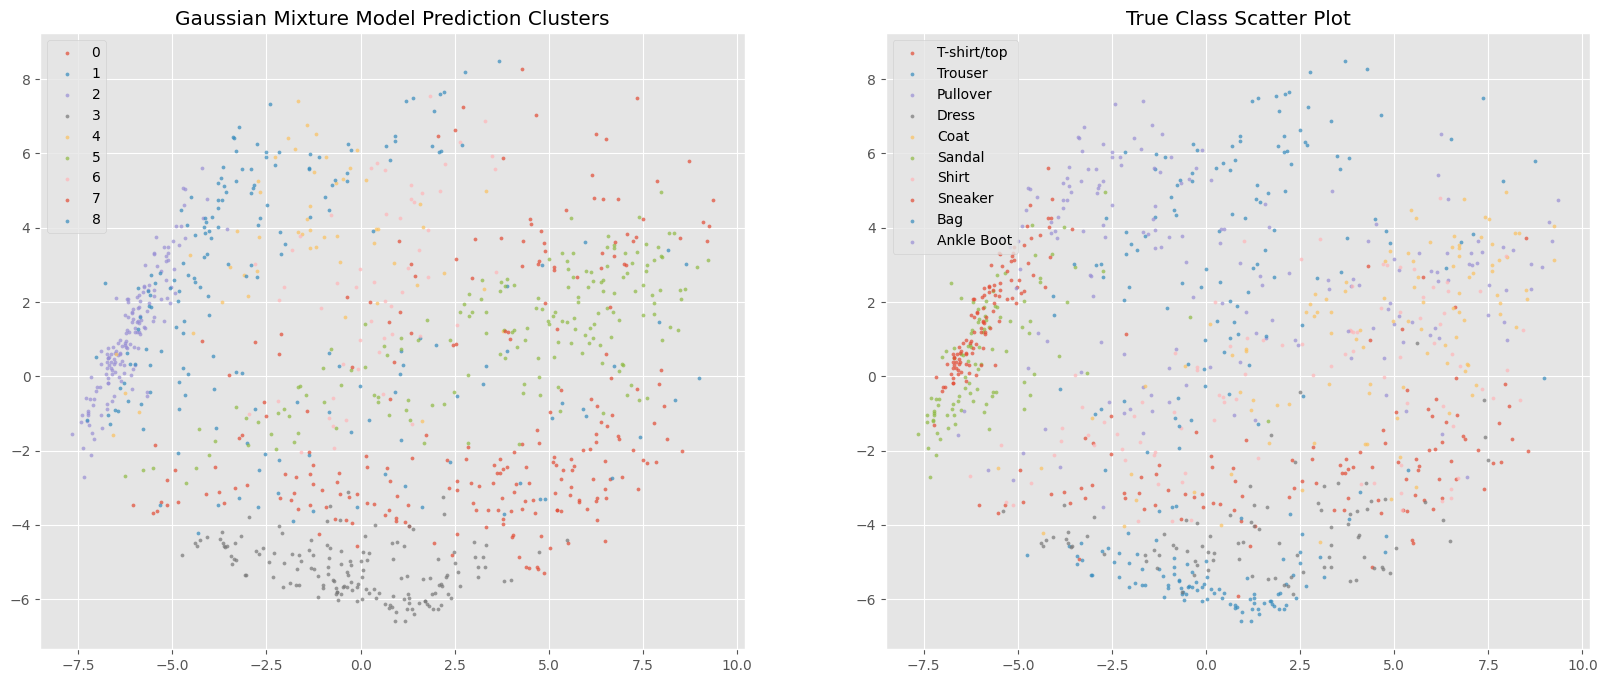

In [132]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(20,8)

for idx,y in enumerate(y_gmm_cols):
    # ax1 = plt.gca()
    sub_df = gmm_plot_df[gmm_plot_df.gmm_predicted_label==idx]
    sub_vals = sub_df.values
    ax1.scatter(sub_vals[:,0],sub_vals[:,1],label=y, marker=".", s=30, lw=0, alpha=0.7, edgecolor="k")
ax1.legend()
ax1.set_title('Gaussian Mixture Model Prediction Clusters')

for idx,y in enumerate(y_cols):
    # ax2 = plt.gca()
    sub_df = gmm_plot_df[gmm_plot_df.label==idx]
    sub_vals = sub_df.values
    ax2.scatter(sub_vals[:,0],sub_vals[:,1],label=y, marker=".", s=30, lw=0, alpha=0.7, edgecolor="k")
ax2.set_title('True Class Scatter Plot')
ax2.legend()
plt.show()

Cluster 0


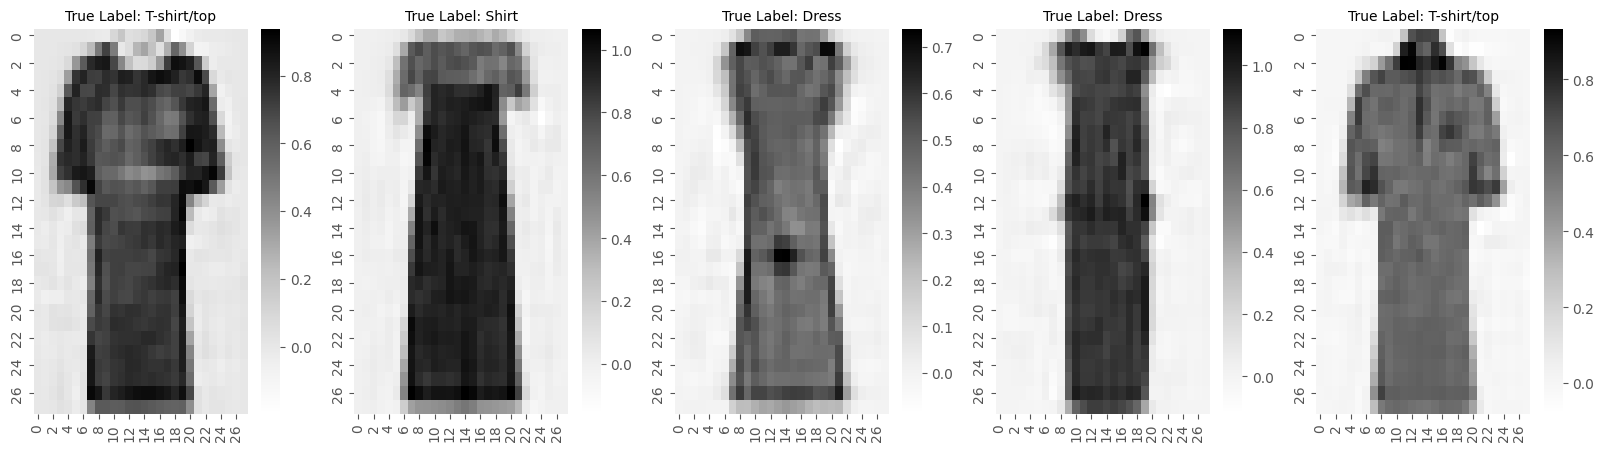

Cluster 1


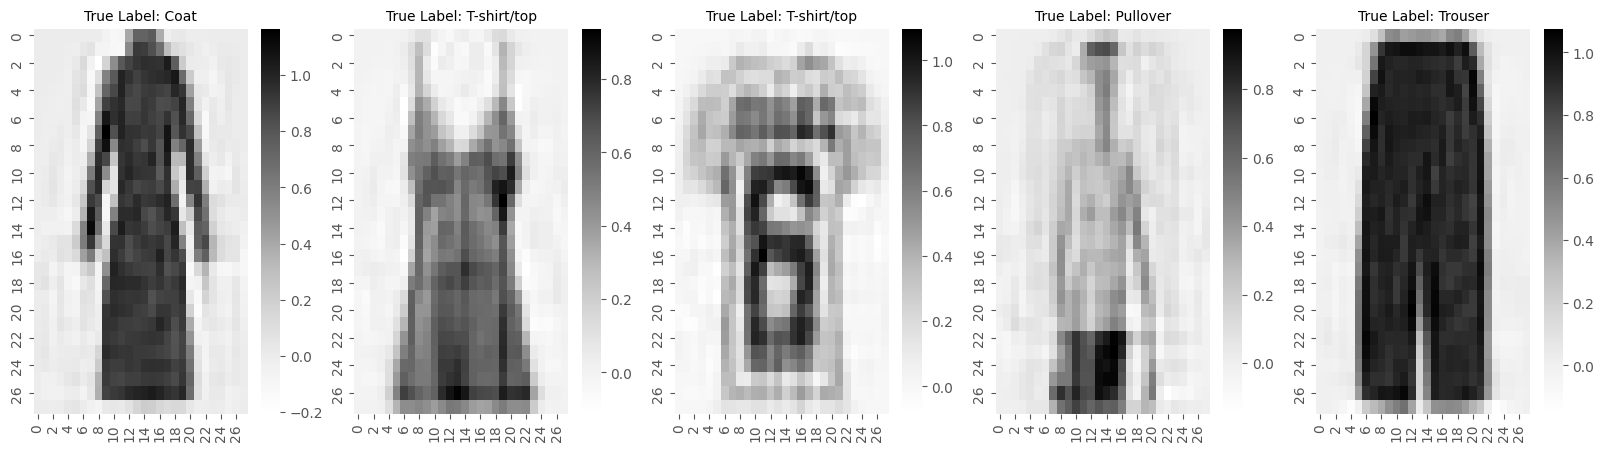

Cluster 2


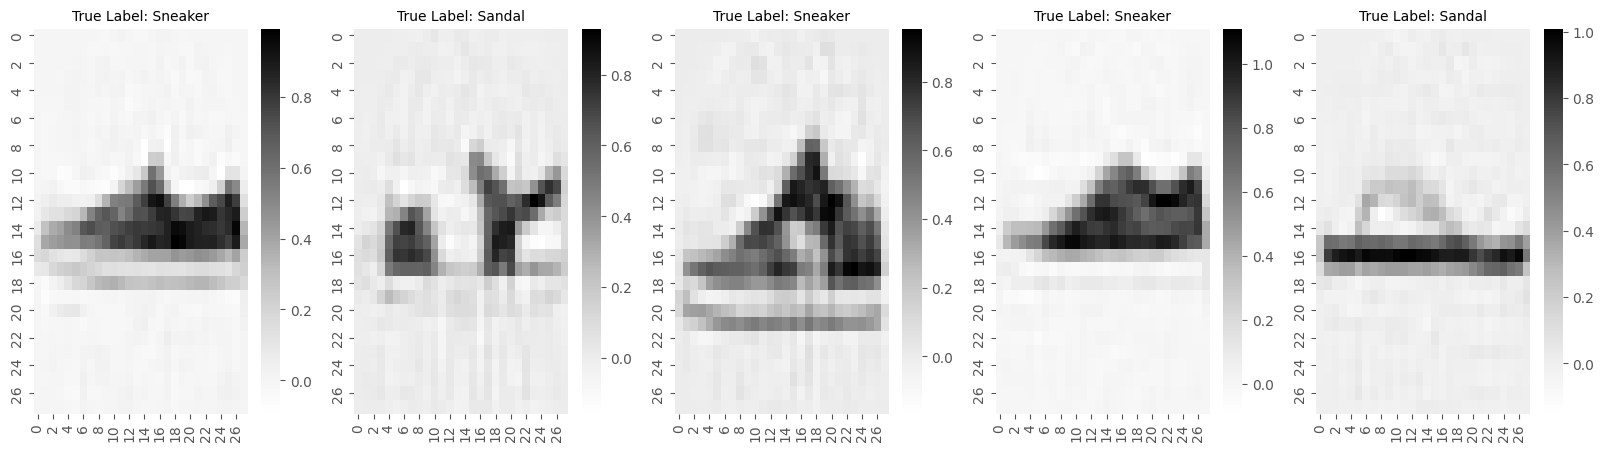

Cluster 3


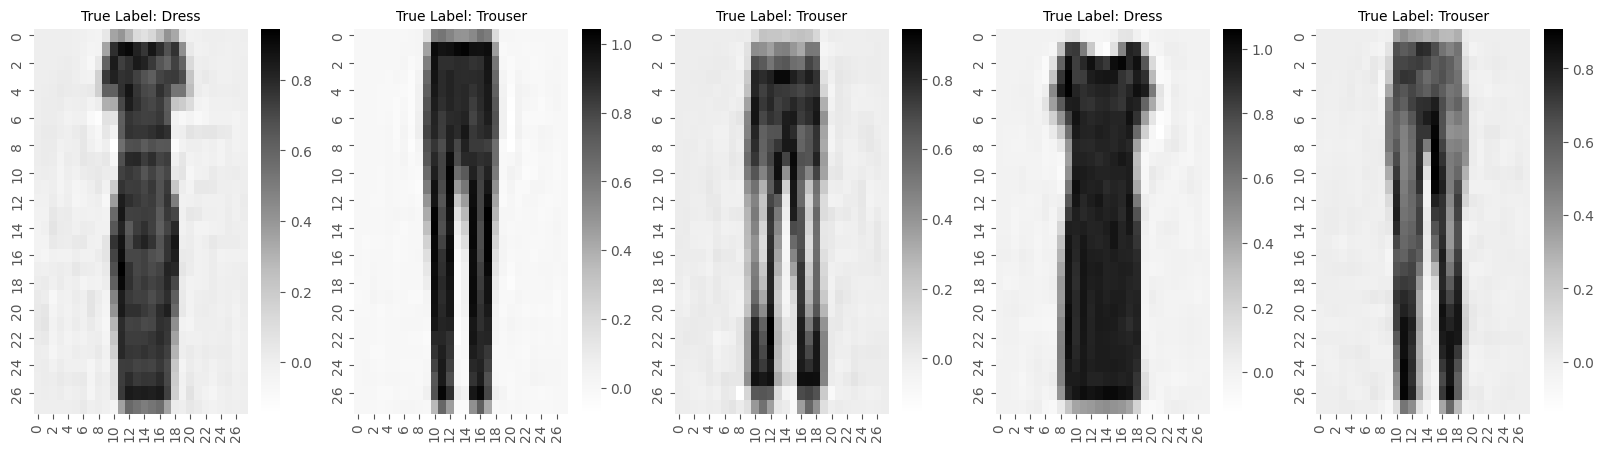

Cluster 4


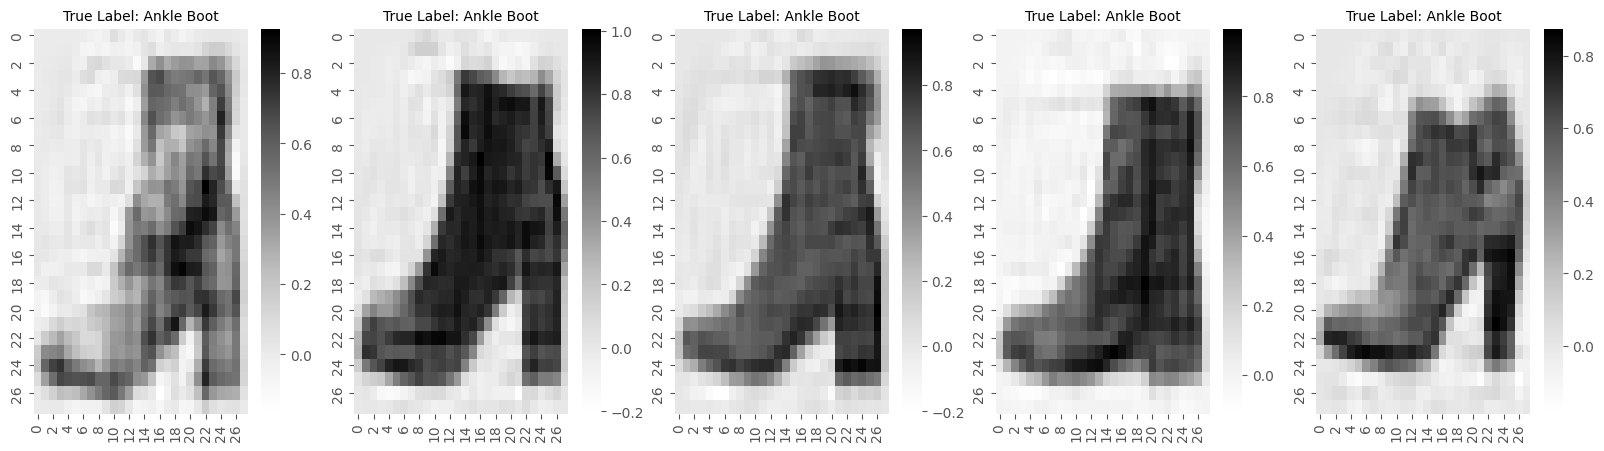

Cluster 5


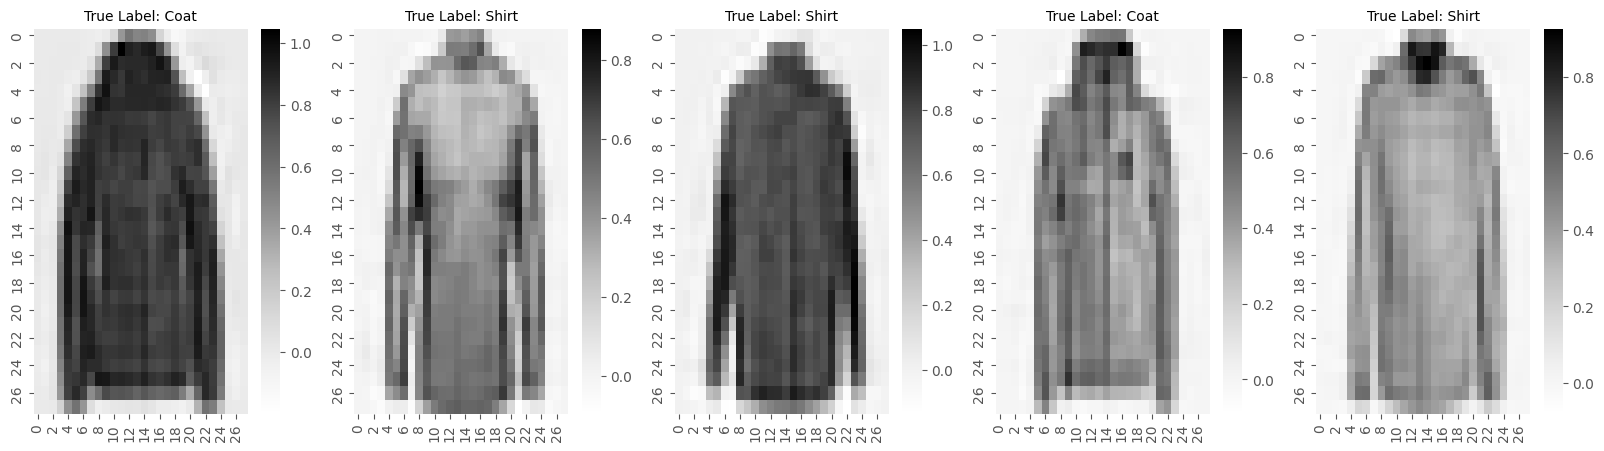

Cluster 6


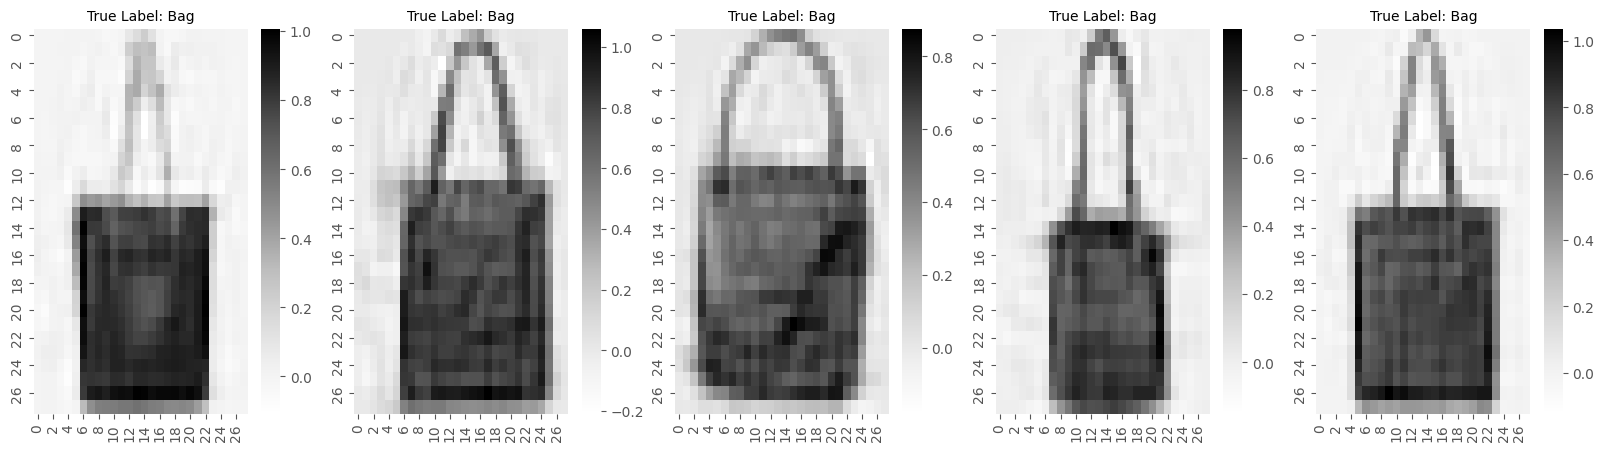

Cluster 7


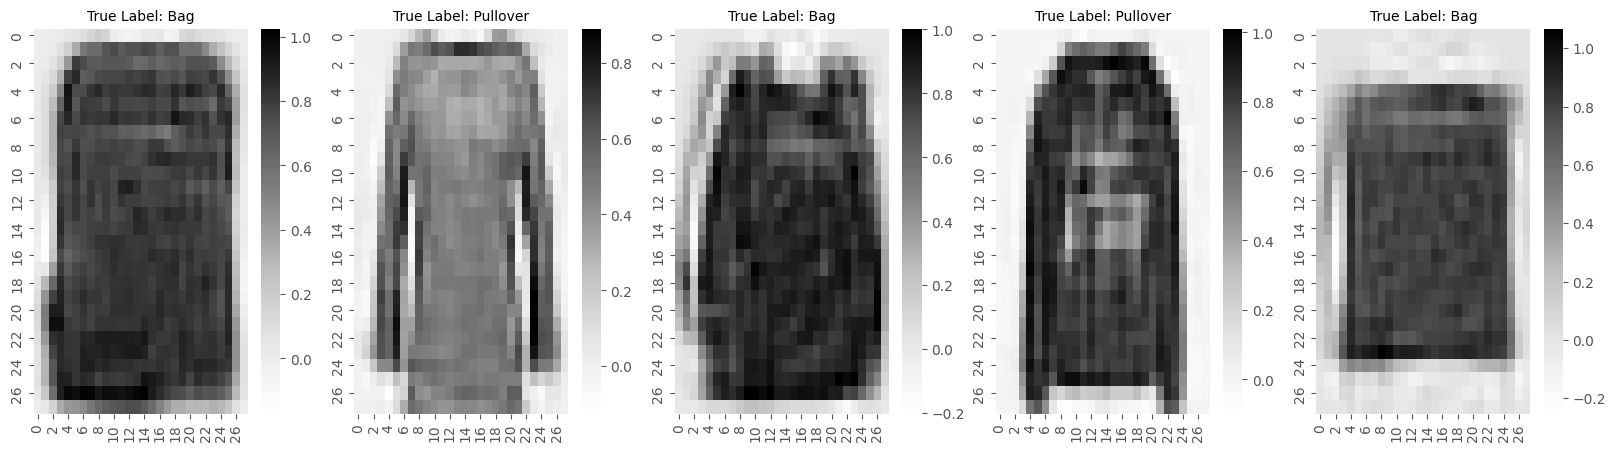

Cluster 8


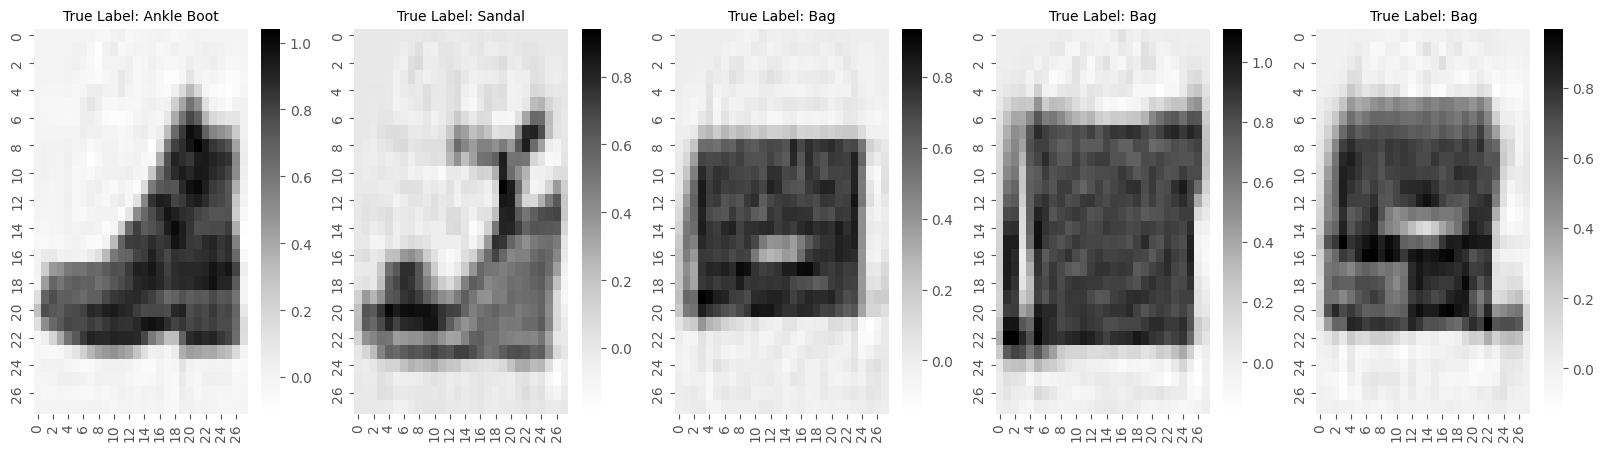

In [133]:
num_imgs = 5
for idx,y in enumerate(y_gmm_cols):
    # ax1 = plt.gca()
    sub_df = gmm_plot_df[gmm_plot_df.gmm_predicted_label==idx]
    sub_df = sub_df.sample(n=num_imgs)
    X_df = sub_df[sub_df.columns[:-2]].values
    X_df = pca_trans.inverse_transform(X_df)
    # print(X_df.shape)
    y_df = sub_df['label'].values
    fig,ax = plt.subplots(1,num_imgs,figsize=(20,5))
    print(f"Cluster {idx}")
    for i in range(num_imgs):
        sns.heatmap(X_df[i].reshape(28,28),cmap='Greys',ax=ax[i])
        ax[i].set_title(f"True Label: {y_cols[y_df[i]]}",fontsize=10)
    plt.show()

## 7. NEURAL NETWORKS IMPLEMENTATION

In [96]:
import tensorflow as tf
from tensorflow import keras

In [98]:
from IPython.display import clear_output
import time
lrs = [0.1,0.001,0.00001]
lr_dict = {}
time_taken = []
for lr in lrs:
    model = keras.Sequential([
    keras.layers.Dense(200, activation='ReLU'),
    keras.layers.Dense(50, activation='ReLU'),
    keras.layers.Dense(10, activation='softmax')
        ])
    model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=100, validation_data=[X_val,y_val],verbose=1)
    end_time = time.time()
    lr_dict.update({str(lr):history})
    clear_output(wait=True)
    time_taken.append((end_time - start_time))

Epoch 1/100
1563/1563 [==============================] - 3s 1ms/step - loss: 1.4270 - accuracy: 0.5821 - val_loss: 0.9454 - val_accuracy: 0.7045
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.8091 - accuracy: 0.7463 - val_loss: 0.7241 - val_accuracy: 0.7637
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6716 - accuracy: 0.7851 - val_loss: 0.6377 - val_accuracy: 0.7908
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6049 - accuracy: 0.8032 - val_loss: 0.5866 - val_accuracy: 0.8037
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5637 - accuracy: 0.8150 - val_loss: 0.5533 - val_accuracy: 0.8147
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5353 - accuracy: 0.8225 - val_loss: 0.5306 - val_accuracy: 0.8184
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5132 - accuracy: 0.8283 - val_loss: 0.5107 - val_ac

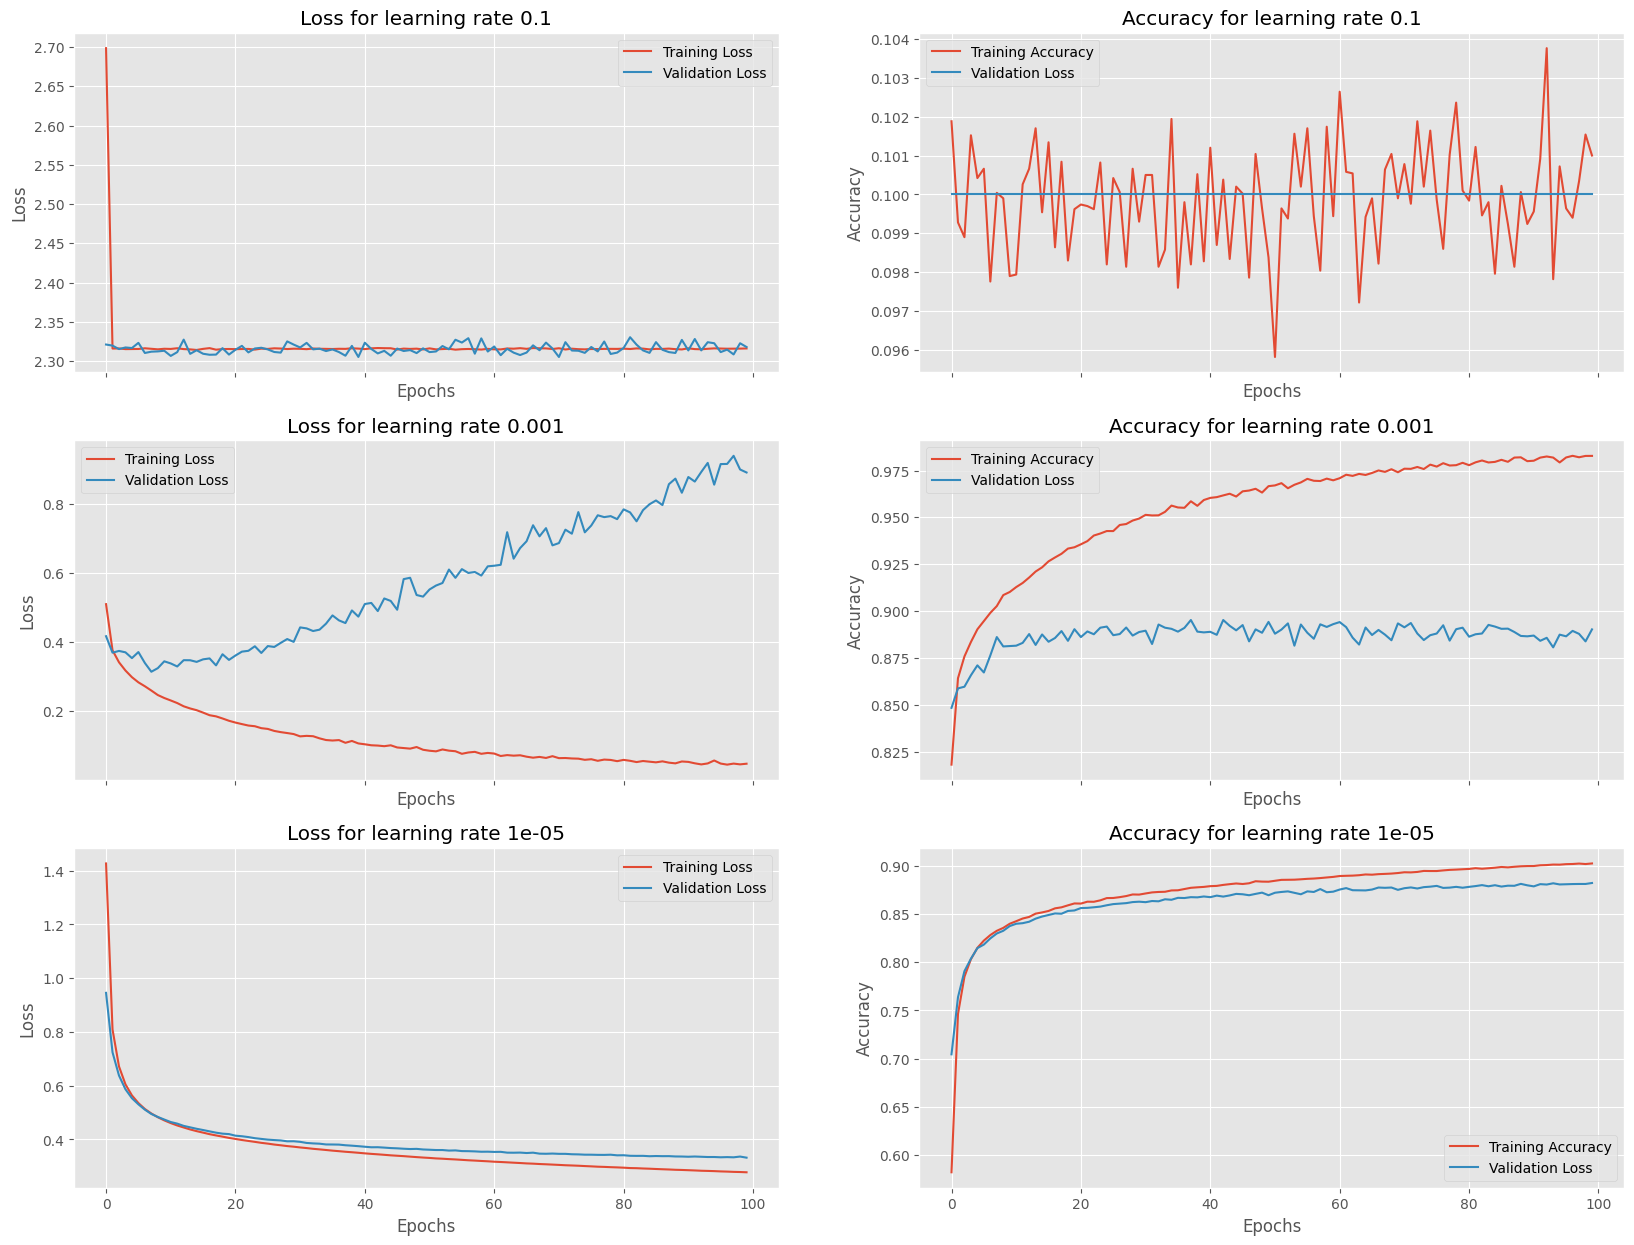

<Figure size 640x480 with 0 Axes>

In [99]:
plt.style.use('ggplot')
def plot_dictionary(lr_dict,save_name:str):
  dict_keys = [k for k in lr_dict.keys()]
  
  fig, axs = plt.subplots(3, 2,sharex=True)
  fig.set_size_inches(20,15)

  axs[0,0].plot(lr_dict[dict_keys[0]].history['loss'],label='Training Loss')
  axs[0,0].plot(lr_dict[dict_keys[0]].history['val_loss'],label='Validation Loss')
  axs[0,1].plot(lr_dict[dict_keys[0]].history['accuracy'],label='Training Accuracy')
  axs[0,1].plot(lr_dict[dict_keys[0]].history['val_accuracy'],label='Validation Loss')
  axs[0,0].set_title(f'Loss for learning rate {dict_keys[0]}')
  axs[0,1].set_title(f'Accuracy for learning rate {dict_keys[0]}')
  axs[0,0].set_xlabel('Epochs')
  axs[0,1].set_xlabel('Epochs')
  axs[0,0].set_ylabel('Loss')
  axs[0,1].set_ylabel('Accuracy')
  axs[0,0].legend()
  axs[0,1].legend()

  axs[1,0].plot(lr_dict[dict_keys[1]].history['loss'],label='Training Loss')
  axs[1,0].plot(lr_dict[dict_keys[1]].history['val_loss'],label='Validation Loss')
  axs[1,1].plot(lr_dict[dict_keys[1]].history['accuracy'],label='Training Accuracy')
  axs[1,1].plot(lr_dict[dict_keys[1]].history['val_accuracy'],label='Validation Loss')
  axs[1,0].set_title(f'Loss for learning rate {dict_keys[1]}')
  axs[1,1].set_title(f'Accuracy for learning rate {dict_keys[1]}')
  axs[1,0].set_xlabel('Epochs')
  axs[1,1].set_xlabel('Epochs')
  axs[1,0].set_ylabel('Loss')
  axs[1,1].set_ylabel('Accuracy')
  axs[1,0].legend()
  axs[1,1].legend()

  axs[2,0].plot(lr_dict[dict_keys[2]].history['loss'],label='Training Loss')
  axs[2,0].plot(lr_dict[dict_keys[2]].history['val_loss'],label='Validation Loss')
  axs[2,1].plot(lr_dict[dict_keys[2]].history['accuracy'],label='Training Accuracy')
  axs[2,1].plot(lr_dict[dict_keys[2]].history['val_accuracy'],label='Validation Loss')
  axs[2,0].set_title(f'Loss for learning rate {dict_keys[2]}')
  axs[2,1].set_title(f'Accuracy for learning rate {dict_keys[2]}')
  axs[2,0].set_xlabel('Epochs')
  axs[2,1].set_xlabel('Epochs')
  axs[2,0].set_ylabel('Loss')
  axs[2,1].set_ylabel('Accuracy')
  axs[2,0].legend()
  axs[2,1].legend()

  plt.show()
  plt.savefig(f'{save_name}.png')

plot_dictionary(lr_dict,'ReLU')

In [103]:
for i in range(len(time_taken)):
    print('Time taken for {} is {} seconds'.format(lrs[i],time_taken[i]))

Time taken for 0.1 is 208.2213478088379 seconds
Time taken for 0.001 is 210.2401475906372 seconds
Time taken for 1e-05 is 210.72658324241638 seconds


In [105]:
from IPython.display import clear_output

lrs = [0.1,0.001,0.00001]
lr_dict_linear = {}
time_taken = []
for lr in lrs:
    model_linear = keras.Sequential([
    keras.layers.Dense(200, activation='linear'),
    keras.layers.Dense(50, activation='linear'),
    keras.layers.Dense(10, activation='softmax')
        ])
    model_linear.compile(loss='sparse_categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    metrics=['accuracy'])
    start_time = time.time()
    history = model_linear.fit(X_train, y_train, epochs=100, validation_data=[X_val,y_val],verbose=1)
    end_time = time.time()
    time_taken.append(end_time - start_time)
    lr_dict_linear.update({str(lr):history})
    clear_output(wait=True)

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2035 - accuracy: 0.6266 - val_loss: 0.8459 - val_accuracy: 0.7176
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.7472 - accuracy: 0.7509 - val_loss: 0.6927 - val_accuracy: 0.7696
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6451 - accuracy: 0.7863 - val_loss: 0.6211 - val_accuracy: 0.7964
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5927 - accuracy: 0.8046 - val_loss: 0.5804 - val_accuracy: 0.8094
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5592 - accuracy: 0.8136 - val_loss: 0.5545 - val_accuracy: 0.8132
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5358 - accuracy: 0.8206 - val_loss: 0.5364 - val_accuracy: 0.8218
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5185 - accuracy: 0.8257 - val_loss: 0.5205 - val_ac

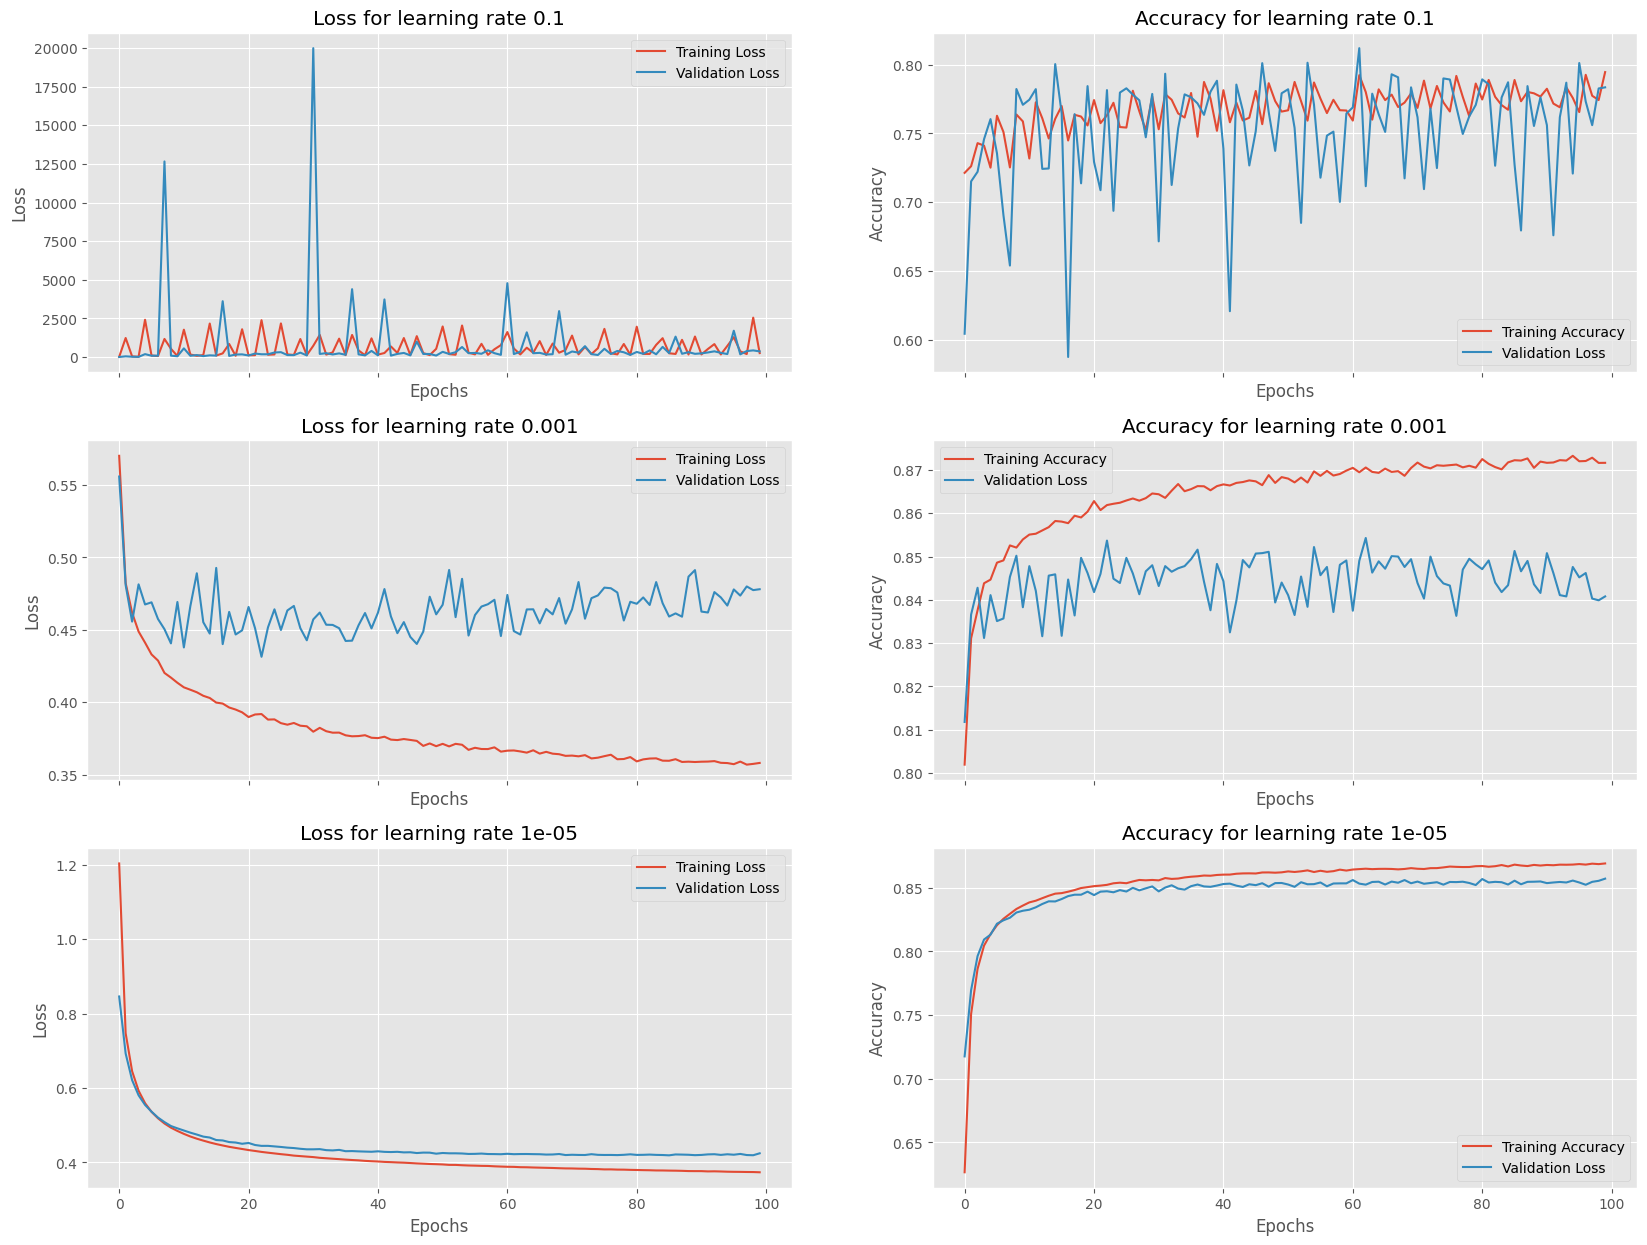

<Figure size 640x480 with 0 Axes>

In [106]:
plot_dictionary(lr_dict_linear,'Linear')

In [107]:
for i in range(len(time_taken)):
    print('Time taken for {} is {} seconds'.format(lrs[i],time_taken[i]))

Time taken for 0.1 is 182.20260405540466 seconds
Time taken for 0.001 is 181.2608687877655 seconds
Time taken for 1e-05 is 182.32756090164185 seconds


In [108]:
model_relu = keras.Sequential([
    keras.layers.Dense(200, activation='ReLU'),
    keras.layers.Dense(50, activation='ReLU'),
    keras.layers.Dense(10, activation='softmax')
        ])
model_relu.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                metrics=['accuracy'])
history = model_relu.fit(X_train, y_train, epochs=100, validation_data=[X_val,y_val],verbose=0)

In [109]:
model_relu.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.3267 - accuracy: 0.8814 - 204ms/epoch - 651us/step


[0.32667168974876404, 0.8813999891281128]

In [110]:
model_linear = keras.Sequential([
    keras.layers.Dense(200, activation='linear'),
    keras.layers.Dense(50, activation='linear'),
    keras.layers.Dense(10, activation='softmax')
        ])
model_linear.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                metrics=['accuracy'])
history = model_linear.fit(X_train, y_train, epochs=100, validation_data=[X_val,y_val],verbose=1)

Epoch 1/100
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2607 - accuracy: 0.5960 - val_loss: 0.8462 - val_accuracy: 0.7187
Epoch 2/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.7485 - accuracy: 0.7536 - val_loss: 0.6876 - val_accuracy: 0.7707
Epoch 3/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6446 - accuracy: 0.7866 - val_loss: 0.6182 - val_accuracy: 0.7937
Epoch 4/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5924 - accuracy: 0.8030 - val_loss: 0.5799 - val_accuracy: 0.8034
Epoch 5/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5592 - accuracy: 0.8118 - val_loss: 0.5521 - val_accuracy: 0.8122
Epoch 6/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5362 - accuracy: 0.8189 - val_loss: 0.5326 - val_accuracy: 0.8172
Epoch 7/100
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5193 - accuracy: 0.8236 - val_loss: 0.5178 - val_ac

In [111]:
model_linear.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.4170 - accuracy: 0.8595 - 199ms/epoch - 636us/step


[0.4170111417770386, 0.859499990940094]

In [112]:
print(model_relu.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 200)               157000    
                                                                 
 dense_31 (Dense)            (None, 50)                10050     
                                                                 
 dense_32 (Dense)            (None, 10)                510       
                                                                 
Total params: 167560 (654.53 KB)
Trainable params: 167560 (654.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [113]:
num_biases = model_relu.layers[0].get_weights()[1].shape[0] + model_relu.layers[1].get_weights()[1].shape[0] + model_relu.layers[2].get_weights()[1].shape[0]

print("Number of bias parameters = ",num_biases)

Number of bias parameters =  260
